In [56]:
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


def linear_Sarsa():
    total_rewards=[]
    env = gym.make('LunarLander-v2')
    w=np.array([[0 for _ in range(8)] for _ in range(4)])
    for iteration in range(10000):
        state = env.reset()
        total_reward=0
        epsilon = min_e + (max_e - min_e)*np.exp(-decay_rate*iteration)
        alpha = min_a + (max_a - min_a)*np.exp(-decay_rate*iteration)
        done=False
        random_value = np.random.random()
        if random_value<=epsilon:
            action = env.action_space.sample()
        else:
            Y=np.dot(w,state)
            action = np.argmax(Y)
        while not done:
            new_state, reward, done, info = env.step(action)
            total_reward+=reward
            random_value = np.random.random()
            if random_value<=epsilon:
                new_action = env.action_space.sample()
            else:
                Y=np.dot(w,new_state)
                new_action = np.argmax(Y)
            if done:
                target = reward
            else:
                Y=np.dot(w,new_state)
                target = reward +gamma*Y[new_action]

            X=state.reshape(1,-1)
            Y=np.dot(w,state)
            Y_target = np.dot(w,state)
            Y_target[action] = target
            w = w+learning_rate*(Y_target[action]-Y[action])*state
            state = new_state
            action =new_action
        total_rewards.append(total_reward)
#         try:
#             print('episode: ', iteration, ' score: ', '%.2f' % total_reward, ' avg_score: ', '%.2f' % np.average(total_rewards[-100:]),'%.5f' % epsilon)
#         except:
#             print('episode: ', iteration, ' score: ', '%.2f' % total_reward, ' avg_score: ', '%.2f' % np.average(total_rewards),'%.5f' % epsilon)
    return w, total_rewards

def evaluate(w,test_episodes=100):
    test_rewards=[]
    for i in range(test_episodes):
        rewards=0
        done = False
        state=env.reset()
        while not done:
            Y=np.dot(w,state)
            action = np.argmax(Y)
            new_state, reward, done, info = env.step(action)
            rewards+=reward
            state=new_state
        test_rewards.append(rewards)
        #print(i,rewards)
    return test_rewards

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


def random_baseline(test_episodes=1000):
    random_rewards=[]
    for i in range(test_episodes):
        rewards=0
        done = False
        state=env.reset()
        while not done:
            action = np.random.choice(4)
            new_state, reward, done, info = env.step(action)
            rewards+=reward
            state=new_state
        random_rewards.append(rewards)
        #print(i,rewards)
    return random_rewards


if __name__=="__main__":
    gamma = 0.9
    decay_rate = 5e-4
    max_e=1
    min_e=1e-4
    max_a=0.01
    min_a=1e-5
    w,total_rewards=linear_Sarsa()
    test_rewards = evaluate(w)

-188.29161272311467

In [58]:

gamma = 0.99
decay_rate = 5e-3
max_e=1
min_e=1e-4
max_a=.01
min_a=1e-5
w,total_rewards3=linear_Sarsa()
test_rewards3 = evaluate(w)


In [59]:
gamma = 0.99
decay_rate = 5e-4
max_e=1
min_e=1e-4
max_a=0.01
min_a=1e-5
w,total_rewards2=linear_Sarsa()
test_rewards2 = evaluate(w)


In [78]:
gamma = 0.7
decay_rate = 1e-4
max_e=1
min_e=1e-4
max_a=0.1
min_a=1e-5
w,total_rewards4=linear_Sarsa()
test_rewards4 = evaluate(w)


In [ ]:

gs=GridSpec(2,3) # 2 rows, 3 columns

ax1=fig.add_subplot(gs[0,0]) # First row, first column
ax2=fig.add_subplot(gs[0,1]) # First row, second column
ax3=fig.add_subplot(gs[0,2]) # First row, third column
ax4=fig.add_subplot(gs[1,:]) # Second row, span all columns

Text(0.5, 1.0, 'Linear Sarsa: Test Performance')

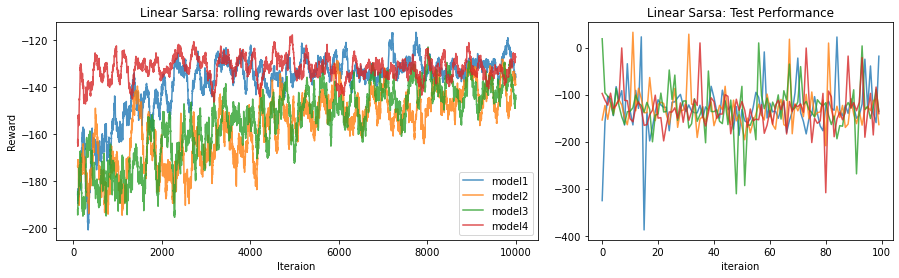

In [95]:
iterations=10000
from matplotlib.gridspec import GridSpec



fig=plt.figure(figsize=(15,4))

gs=GridSpec(1,5) # 2 rows, 3 columns

ax1=fig.add_subplot(gs[0,:3]) # First row, first column
ax2=fig.add_subplot(gs[0,3:]) # First row, second column
gs.update(wspace=0.4, hspace=10)

ax1.plot(range(1,iterations+2)[100:],running_mean(total_rewards,100),alpha=0.8,label="model1")
ax1.plot(range(1,iterations+2)[100:],running_mean(total_rewards2,100),alpha=0.8,label="model2")

ax1.plot(range(1,iterations+2)[100:],running_mean(total_rewards4,100),alpha=0.8,label="model3")
ax1.plot(range(1,iterations+2)[100:],running_mean(total_rewards3,100),alpha=0.8,label="model4")
ax1.set_ylabel('Reward')
ax1.set_xlabel('Iteraion')
ax1.set_title('Linear Sarsa: rolling rewards over last 100 episodes')
ax1.legend(loc='lower right')
ax2.plot(range(100),test_rewards,alpha=0.8,label="model1")
ax2.plot(range(100),test_rewards2,alpha=0.8,label="model2")
ax2.plot(range(100),test_rewards4,alpha=0.8,label="model3")
ax2.plot(range(100),test_rewards3,alpha=0.8,label="model4")
ax2.set_xlabel('iteraion')
ax2.set_title('Linear Sarsa: Test Performance')


In [19]:


learning_rate=0.01
gamma = 0.99
decay_rate = 0.0005
max_e=1
min_e=0.0005
max_a=0.01
min_a=0.00001

total_rewards=[]
w=np.array([[0 for _ in range(8)] for _ in range(4)])
for iteration in range(5000):
    state = env.reset()
    total_reward=0
    epsilon = min_e + (max_e - min_e)*np.exp(-decay_rate*iteration)
    alpha = min_a + (max_a - min_a)*np.exp(-decay_rate*iteration)
    done=False
    random_value = np.random.random()
    if random_value<=epsilon:
        action = env.action_space.sample()
    else:
        Y=np.dot(w,state)
        action = np.argmax(Y)
    while not done:
        new_state, reward, done, info = env.step(action)
        total_reward+=reward
        random_value = np.random.random()
        if random_value<=epsilon:
            new_action = env.action_space.sample()
        else:
            Y=np.dot(w,new_state)
            new_action = np.argmax(Y)
        if done:
            target = reward
        else:
            Y=np.dot(w,new_state)
            target = reward +gamma*Y[new_action]
            
        X=state.reshape(1,-1)
        Y=np.dot(w,state)
        Y_target = np.dot(w,state)
        Y_target[action] = target
        w = w+learning_rate*(Y_target[action]-Y[action])*state
        state = new_state
        action =new_action
    total_rewards.append(total_reward)
    try:
        print('episode: ', iteration, ' score: ', '%.2f' % total_reward, ' avg_score: ', '%.2f' % np.average(total_rewards[-100:]),'%.5f' % epsilon)
    except:
        print('episode: ', iteration, ' score: ', '%.2f' % total_reward, ' avg_score: ', '%.2f' % np.average(total_rewards),'%.5f' % epsilon)

    

episode:  0  score:  -73.98  avg_score:  -73.98 1.00000
episode:  1  score:  -414.35  avg_score:  -244.17 0.99950
episode:  2  score:  -363.84  avg_score:  -284.06 0.99900
episode:  3  score:  -148.98  avg_score:  -250.29 0.99850
episode:  4  score:  -83.55  avg_score:  -216.94 0.99800
episode:  5  score:  -150.49  avg_score:  -205.87 0.99750
episode:  6  score:  -320.80  avg_score:  -222.29 0.99701
episode:  7  score:  -128.87  avg_score:  -210.61 0.99651
episode:  8  score:  -342.25  avg_score:  -225.24 0.99601
episode:  9  score:  -23.66  avg_score:  -205.08 0.99551
episode:  10  score:  -67.02  avg_score:  -192.53 0.99501
episode:  11  score:  -187.27  avg_score:  -192.09 0.99452
episode:  12  score:  -97.81  avg_score:  -184.84 0.99402
episode:  13  score:  -131.72  avg_score:  -181.04 0.99352
episode:  14  score:  -93.47  avg_score:  -175.20 0.99303
episode:  15  score:  -323.29  avg_score:  -184.46 0.99253
episode:  16  score:  -107.10  avg_score:  -179.91 0.99204
episode:  17  

episode:  142  score:  -381.33  avg_score:  -188.77 0.93150
episode:  143  score:  -132.56  avg_score:  -188.13 0.93103
episode:  144  score:  20.16  avg_score:  -186.77 0.93057
episode:  145  score:  -107.98  avg_score:  -185.71 0.93010
episode:  146  score:  -215.72  avg_score:  -185.62 0.92964
episode:  147  score:  -297.81  avg_score:  -187.25 0.92917
episode:  148  score:  -206.95  avg_score:  -188.07 0.92871
episode:  149  score:  -65.45  avg_score:  -187.74 0.92824
episode:  150  score:  -125.62  avg_score:  -188.13 0.92778
episode:  151  score:  -155.61  avg_score:  -189.15 0.92732
episode:  152  score:  -214.02  avg_score:  -189.50 0.92685
episode:  153  score:  -408.84  avg_score:  -192.59 0.92639
episode:  154  score:  -230.52  avg_score:  -193.80 0.92593
episode:  155  score:  -180.69  avg_score:  -194.43 0.92546
episode:  156  score:  -378.16  avg_score:  -197.22 0.92500
episode:  157  score:  -366.64  avg_score:  -197.61 0.92454
episode:  158  score:  -614.01  avg_score: 

episode:  283  score:  -120.26  avg_score:  -184.84 0.86812
episode:  284  score:  -125.97  avg_score:  -181.71 0.86769
episode:  285  score:  -261.69  avg_score:  -183.05 0.86725
episode:  286  score:  -206.44  avg_score:  -184.22 0.86682
episode:  287  score:  -108.69  avg_score:  -184.14 0.86639
episode:  288  score:  -218.61  avg_score:  -185.12 0.86595
episode:  289  score:  -107.81  avg_score:  -183.98 0.86552
episode:  290  score:  -193.79  avg_score:  -182.31 0.86509
episode:  291  score:  -106.11  avg_score:  -180.95 0.86466
episode:  292  score:  -143.26  avg_score:  -180.44 0.86423
episode:  293  score:  -129.47  avg_score:  -180.56 0.86379
episode:  294  score:  -126.47  avg_score:  -178.71 0.86336
episode:  295  score:  -201.78  avg_score:  -177.79 0.86293
episode:  296  score:  -162.45  avg_score:  -178.38 0.86250
episode:  297  score:  -164.22  avg_score:  -178.51 0.86207
episode:  298  score:  -388.18  avg_score:  -181.52 0.86164
episode:  299  score:  -146.07  avg_scor

episode:  424  score:  -106.06  avg_score:  -164.19 0.80906
episode:  425  score:  9.25  avg_score:  -163.02 0.80866
episode:  426  score:  -276.62  avg_score:  -164.54 0.80825
episode:  427  score:  -90.22  avg_score:  -164.48 0.80785
episode:  428  score:  -151.57  avg_score:  -164.66 0.80744
episode:  429  score:  -337.15  avg_score:  -166.76 0.80704
episode:  430  score:  -116.17  avg_score:  -166.52 0.80664
episode:  431  score:  -72.46  avg_score:  -166.16 0.80624
episode:  432  score:  -177.07  avg_score:  -164.64 0.80583
episode:  433  score:  -137.46  avg_score:  -164.01 0.80543
episode:  434  score:  -112.70  avg_score:  -163.58 0.80503
episode:  435  score:  -120.34  avg_score:  -163.50 0.80463
episode:  436  score:  -135.55  avg_score:  -162.39 0.80422
episode:  437  score:  -425.39  avg_score:  -164.24 0.80382
episode:  438  score:  -126.03  avg_score:  -163.71 0.80342
episode:  439  score:  -112.82  avg_score:  -163.47 0.80302
episode:  440  score:  -127.96  avg_score:  -

episode:  571  score:  -76.23  avg_score:  -159.71 0.75176
episode:  572  score:  -90.95  avg_score:  -159.65 0.75139
episode:  573  score:  -206.50  avg_score:  -160.48 0.75101
episode:  574  score:  -99.92  avg_score:  -159.54 0.75064
episode:  575  score:  -115.00  avg_score:  -160.15 0.75026
episode:  576  score:  -141.11  avg_score:  -159.87 0.74989
episode:  577  score:  -216.11  avg_score:  -160.83 0.74951
episode:  578  score:  -116.13  avg_score:  -159.38 0.74914
episode:  579  score:  -115.22  avg_score:  -159.18 0.74876
episode:  580  score:  -105.54  avg_score:  -158.99 0.74839
episode:  581  score:  -260.31  avg_score:  -159.94 0.74802
episode:  582  score:  -179.86  avg_score:  -159.97 0.74764
episode:  583  score:  -119.63  avg_score:  -157.10 0.74727
episode:  584  score:  -84.68  avg_score:  -156.77 0.74690
episode:  585  score:  -54.00  avg_score:  -156.27 0.74652
episode:  586  score:  -315.57  avg_score:  -158.80 0.74615
episode:  587  score:  36.71  avg_score:  -15

episode:  715  score:  -180.11  avg_score:  -173.30 0.69957
episode:  716  score:  -256.68  avg_score:  -174.22 0.69922
episode:  717  score:  -141.11  avg_score:  -172.57 0.69887
episode:  718  score:  -344.68  avg_score:  -175.11 0.69853
episode:  719  score:  -217.26  avg_score:  -176.24 0.69818
episode:  720  score:  -125.54  avg_score:  -175.96 0.69783
episode:  721  score:  -170.23  avg_score:  -175.69 0.69748
episode:  722  score:  -300.23  avg_score:  -176.88 0.69713
episode:  723  score:  -103.96  avg_score:  -176.69 0.69678
episode:  724  score:  -168.62  avg_score:  -177.09 0.69643
episode:  725  score:  -104.09  avg_score:  -174.96 0.69609
episode:  726  score:  -74.54  avg_score:  -174.51 0.69574
episode:  727  score:  -47.28  avg_score:  -172.06 0.69539
episode:  728  score:  -111.56  avg_score:  -172.05 0.69504
episode:  729  score:  -76.16  avg_score:  -169.24 0.69470
episode:  730  score:  -119.21  avg_score:  -169.70 0.69435
episode:  731  score:  -76.56  avg_score:  

episode:  993  score:  79.68  avg_score:  -145.68 0.60885
episode:  994  score:  -166.96  avg_score:  -145.72 0.60855
episode:  995  score:  -74.61  avg_score:  -144.49 0.60824
episode:  996  score:  -326.46  avg_score:  -144.56 0.60794
episode:  997  score:  -104.11  avg_score:  -144.85 0.60764
episode:  998  score:  -159.79  avg_score:  -144.04 0.60733
episode:  999  score:  -156.54  avg_score:  -144.56 0.60703
episode:  1000  score:  -143.80  avg_score:  -144.98 0.60673
episode:  1001  score:  -158.37  avg_score:  -145.21 0.60642
episode:  1002  score:  -83.29  avg_score:  -143.38 0.60612
episode:  1003  score:  -130.77  avg_score:  -142.36 0.60582
episode:  1004  score:  -205.80  avg_score:  -143.29 0.60552
episode:  1005  score:  -102.88  avg_score:  -143.03 0.60521
episode:  1006  score:  -101.81  avg_score:  -141.87 0.60491
episode:  1007  score:  -90.19  avg_score:  -141.51 0.60461
episode:  1008  score:  -198.41  avg_score:  -141.73 0.60431
episode:  1009  score:  -97.99  avg_

episode:  1136  score:  -287.16  avg_score:  -160.93 0.56687
episode:  1137  score:  -412.74  avg_score:  -162.84 0.56659
episode:  1138  score:  -56.80  avg_score:  -162.89 0.56631
episode:  1139  score:  -115.22  avg_score:  -162.68 0.56603
episode:  1140  score:  -190.37  avg_score:  -162.29 0.56574
episode:  1141  score:  -311.00  avg_score:  -163.53 0.56546
episode:  1142  score:  -162.93  avg_score:  -163.56 0.56518
episode:  1143  score:  -122.93  avg_score:  -162.47 0.56490
episode:  1144  score:  6.67  avg_score:  -159.80 0.56461
episode:  1145  score:  -128.44  avg_score:  -160.09 0.56433
episode:  1146  score:  -88.67  avg_score:  -159.78 0.56405
episode:  1147  score:  -90.86  avg_score:  -158.71 0.56377
episode:  1148  score:  -139.33  avg_score:  -158.45 0.56349
episode:  1149  score:  -124.37  avg_score:  -156.50 0.56320
episode:  1150  score:  -336.78  avg_score:  -158.59 0.56292
episode:  1151  score:  -113.55  avg_score:  -158.10 0.56264
episode:  1152  score:  -402.9

episode:  1280  score:  -277.74  avg_score:  -153.84 0.52753
episode:  1281  score:  -165.40  avg_score:  -154.23 0.52727
episode:  1282  score:  -103.49  avg_score:  -154.14 0.52700
episode:  1283  score:  -165.86  avg_score:  -153.34 0.52674
episode:  1284  score:  -143.89  avg_score:  -153.25 0.52648
episode:  1285  score:  -183.74  avg_score:  -153.87 0.52621
episode:  1286  score:  -157.18  avg_score:  -154.21 0.52595
episode:  1287  score:  -94.65  avg_score:  -154.83 0.52569
episode:  1288  score:  -64.25  avg_score:  -153.93 0.52542
episode:  1289  score:  -92.81  avg_score:  -153.35 0.52516
episode:  1290  score:  -74.21  avg_score:  -152.12 0.52490
episode:  1291  score:  -149.29  avg_score:  -150.38 0.52464
episode:  1292  score:  -136.12  avg_score:  -149.04 0.52438
episode:  1293  score:  -117.55  avg_score:  -149.31 0.52411
episode:  1294  score:  -131.72  avg_score:  -149.35 0.52385
episode:  1295  score:  -121.86  avg_score:  -149.37 0.52359
episode:  1296  score:  -134

episode:  1434  score:  -123.08  avg_score:  -165.45 0.48847
episode:  1435  score:  -145.00  avg_score:  -164.34 0.48823
episode:  1436  score:  -131.09  avg_score:  -164.67 0.48798
episode:  1437  score:  -86.52  avg_score:  -164.35 0.48774
episode:  1438  score:  -172.77  avg_score:  -164.20 0.48750
episode:  1439  score:  -113.61  avg_score:  -165.06 0.48725
episode:  1440  score:  -116.83  avg_score:  -162.62 0.48701
episode:  1441  score:  -119.23  avg_score:  -159.52 0.48677
episode:  1442  score:  -91.09  avg_score:  -159.29 0.48652
episode:  1443  score:  -124.60  avg_score:  -159.58 0.48628
episode:  1444  score:  -114.86  avg_score:  -159.58 0.48604
episode:  1445  score:  -302.14  avg_score:  -161.27 0.48579
episode:  1446  score:  -104.37  avg_score:  -159.41 0.48555
episode:  1447  score:  -92.95  avg_score:  -159.33 0.48531
episode:  1448  score:  -85.46  avg_score:  -159.51 0.48507
episode:  1449  score:  -121.83  avg_score:  -159.11 0.48482
episode:  1450  score:  -104

episode:  1585  score:  -270.04  avg_score:  -151.27 0.45299
episode:  1586  score:  -117.66  avg_score:  -150.40 0.45276
episode:  1587  score:  -107.36  avg_score:  -150.37 0.45253
episode:  1588  score:  -240.30  avg_score:  -150.66 0.45231
episode:  1589  score:  -39.61  avg_score:  -149.72 0.45208
episode:  1590  score:  -149.03  avg_score:  -149.88 0.45186
episode:  1591  score:  -238.42  avg_score:  -151.22 0.45163
episode:  1592  score:  -211.09  avg_score:  -151.91 0.45140
episode:  1593  score:  -129.94  avg_score:  -151.47 0.45118
episode:  1594  score:  -89.17  avg_score:  -150.92 0.45095
episode:  1595  score:  -191.26  avg_score:  -151.53 0.45073
episode:  1596  score:  -135.28  avg_score:  -152.02 0.45050
episode:  1597  score:  -141.09  avg_score:  -152.33 0.45028
episode:  1598  score:  -172.18  avg_score:  -152.47 0.45005
episode:  1599  score:  7.56  avg_score:  -151.17 0.44983
episode:  1600  score:  36.34  avg_score:  -149.51 0.44960
episode:  1601  score:  -109.21

episode:  1731  score:  -296.15  avg_score:  -158.47 0.42113
episode:  1732  score:  -26.97  avg_score:  -154.88 0.42092
episode:  1733  score:  -124.26  avg_score:  -155.15 0.42071
episode:  1734  score:  -77.27  avg_score:  -155.01 0.42050
episode:  1735  score:  -149.23  avg_score:  -155.27 0.42029
episode:  1736  score:  -118.80  avg_score:  -154.89 0.42008
episode:  1737  score:  -105.69  avg_score:  -154.81 0.41987
episode:  1738  score:  -89.85  avg_score:  -155.06 0.41966
episode:  1739  score:  -212.57  avg_score:  -156.24 0.41945
episode:  1740  score:  -100.39  avg_score:  -155.54 0.41924
episode:  1741  score:  -153.38  avg_score:  -156.09 0.41903
episode:  1742  score:  -378.57  avg_score:  -158.35 0.41882
episode:  1743  score:  -119.57  avg_score:  -156.24 0.41861
episode:  1744  score:  -163.42  avg_score:  -156.68 0.41841
episode:  1745  score:  -137.01  avg_score:  -156.45 0.41820
episode:  1746  score:  -148.59  avg_score:  -156.74 0.41799
episode:  1747  score:  -15

episode:  1883  score:  -131.59  avg_score:  -127.21 0.39035
episode:  1884  score:  -183.51  avg_score:  -127.80 0.39015
episode:  1885  score:  -144.56  avg_score:  -127.99 0.38996
episode:  1886  score:  -112.72  avg_score:  -128.04 0.38976
episode:  1887  score:  -104.98  avg_score:  -127.79 0.38957
episode:  1888  score:  -135.70  avg_score:  -127.90 0.38937
episode:  1889  score:  -126.91  avg_score:  -128.14 0.38918
episode:  1890  score:  -73.63  avg_score:  -128.08 0.38899
episode:  1891  score:  -116.56  avg_score:  -128.16 0.38879
episode:  1892  score:  -108.78  avg_score:  -128.04 0.38860
episode:  1893  score:  -153.03  avg_score:  -128.39 0.38840
episode:  1894  score:  -176.50  avg_score:  -129.49 0.38821
episode:  1895  score:  -111.02  avg_score:  -129.39 0.38802
episode:  1896  score:  -103.59  avg_score:  -129.13 0.38782
episode:  1897  score:  -130.03  avg_score:  -129.01 0.38763
episode:  1898  score:  -140.54  avg_score:  -129.23 0.38743
episode:  1899  score:  -

episode:  2019  score:  -160.48  avg_score:  -128.57 0.36472
episode:  2020  score:  -288.69  avg_score:  -129.78 0.36454
episode:  2021  score:  -116.12  avg_score:  -129.38 0.36435
episode:  2022  score:  -115.56  avg_score:  -129.51 0.36417
episode:  2023  score:  -216.79  avg_score:  -130.34 0.36399
episode:  2024  score:  -95.53  avg_score:  -130.30 0.36381
episode:  2025  score:  -112.25  avg_score:  -129.95 0.36363
episode:  2026  score:  -115.88  avg_score:  -130.30 0.36345
episode:  2027  score:  -120.06  avg_score:  -129.95 0.36326
episode:  2028  score:  -109.43  avg_score:  -129.16 0.36308
episode:  2029  score:  -109.80  avg_score:  -129.13 0.36290
episode:  2030  score:  -11.93  avg_score:  -127.97 0.36272
episode:  2031  score:  -107.83  avg_score:  -128.07 0.36254
episode:  2032  score:  -103.76  avg_score:  -128.08 0.36236
episode:  2033  score:  -209.95  avg_score:  -128.61 0.36218
episode:  2034  score:  -208.42  avg_score:  -129.86 0.36200
episode:  2035  score:  -1

episode:  2177  score:  -158.72  avg_score:  -133.83 0.33705
episode:  2178  score:  -208.11  avg_score:  -134.62 0.33688
episode:  2179  score:  -0.67  avg_score:  -132.98 0.33672
episode:  2180  score:  -115.15  avg_score:  -133.34 0.33655
episode:  2181  score:  -120.56  avg_score:  -133.53 0.33638
episode:  2182  score:  -67.02  avg_score:  -132.73 0.33621
episode:  2183  score:  -129.22  avg_score:  -132.73 0.33604
episode:  2184  score:  -116.91  avg_score:  -132.60 0.33588
episode:  2185  score:  -157.55  avg_score:  -133.09 0.33571
episode:  2186  score:  -174.76  avg_score:  -132.89 0.33554
episode:  2187  score:  -172.43  avg_score:  -133.73 0.33537
episode:  2188  score:  -116.92  avg_score:  -132.60 0.33521
episode:  2189  score:  -234.56  avg_score:  -133.66 0.33504
episode:  2190  score:  -164.71  avg_score:  -134.19 0.33487
episode:  2191  score:  -112.67  avg_score:  -133.78 0.33471
episode:  2192  score:  -98.69  avg_score:  -132.14 0.33454
episode:  2193  score:  -129

episode:  2319  score:  -127.84  avg_score:  -146.46 0.31399
episode:  2320  score:  -109.55  avg_score:  -145.93 0.31383
episode:  2321  score:  25.11  avg_score:  -144.35 0.31367
episode:  2322  score:  -127.75  avg_score:  -143.82 0.31352
episode:  2323  score:  -163.98  avg_score:  -144.43 0.31336
episode:  2324  score:  -99.90  avg_score:  -143.65 0.31320
episode:  2325  score:  -119.60  avg_score:  -143.37 0.31305
episode:  2326  score:  -145.61  avg_score:  -142.39 0.31289
episode:  2327  score:  -85.11  avg_score:  -142.03 0.31273
episode:  2328  score:  -129.30  avg_score:  -141.93 0.31258
episode:  2329  score:  -205.86  avg_score:  -142.16 0.31242
episode:  2330  score:  -116.93  avg_score:  -141.69 0.31227
episode:  2331  score:  -145.36  avg_score:  -141.56 0.31211
episode:  2332  score:  -101.46  avg_score:  -140.08 0.31196
episode:  2333  score:  -113.72  avg_score:  -139.53 0.31180
episode:  2334  score:  -167.40  avg_score:  -140.29 0.31164
episode:  2335  score:  -123

episode:  2463  score:  -197.76  avg_score:  -144.61 0.29221
episode:  2464  score:  -139.65  avg_score:  -144.70 0.29206
episode:  2465  score:  -164.69  avg_score:  -144.76 0.29192
episode:  2466  score:  -115.13  avg_score:  -144.61 0.29177
episode:  2467  score:  -179.11  avg_score:  -144.84 0.29163
episode:  2468  score:  -158.12  avg_score:  -145.12 0.29148
episode:  2469  score:  -249.17  avg_score:  -146.16 0.29133
episode:  2470  score:  -145.88  avg_score:  -146.39 0.29119
episode:  2471  score:  -205.40  avg_score:  -146.86 0.29104
episode:  2472  score:  -201.75  avg_score:  -147.21 0.29090
episode:  2473  score:  -160.81  avg_score:  -147.46 0.29075
episode:  2474  score:  -117.19  avg_score:  -148.75 0.29061
episode:  2475  score:  2.35  avg_score:  -147.52 0.29046
episode:  2476  score:  -141.60  avg_score:  -146.33 0.29032
episode:  2477  score:  -114.71  avg_score:  -143.13 0.29017
episode:  2478  score:  -125.20  avg_score:  -143.13 0.29003
episode:  2479  score:  -14

episode:  2610  score:  -77.19  avg_score:  -136.31 0.27154
episode:  2611  score:  -109.30  avg_score:  -135.86 0.27140
episode:  2612  score:  -146.32  avg_score:  -136.07 0.27127
episode:  2613  score:  -114.49  avg_score:  -136.05 0.27113
episode:  2614  score:  -138.99  avg_score:  -135.61 0.27100
episode:  2615  score:  -87.99  avg_score:  -135.12 0.27086
episode:  2616  score:  -303.95  avg_score:  -137.10 0.27073
episode:  2617  score:  -97.01  avg_score:  -136.72 0.27059
episode:  2618  score:  -110.99  avg_score:  -137.85 0.27045
episode:  2619  score:  -247.70  avg_score:  -139.11 0.27032
episode:  2620  score:  -132.17  avg_score:  -139.17 0.27019
episode:  2621  score:  -169.43  avg_score:  -139.62 0.27005
episode:  2622  score:  -144.10  avg_score:  -139.71 0.26992
episode:  2623  score:  -165.14  avg_score:  -139.96 0.26978
episode:  2624  score:  -40.40  avg_score:  -139.40 0.26965
episode:  2625  score:  -136.93  avg_score:  -139.79 0.26951
episode:  2626  score:  -108

episode:  2757  score:  -155.43  avg_score:  -142.05 0.25233
episode:  2758  score:  -282.61  avg_score:  -142.90 0.25220
episode:  2759  score:  -134.55  avg_score:  -143.30 0.25208
episode:  2760  score:  -120.07  avg_score:  -142.35 0.25195
episode:  2761  score:  -96.77  avg_score:  -141.83 0.25183
episode:  2762  score:  -155.85  avg_score:  -141.30 0.25170
episode:  2763  score:  -204.26  avg_score:  -141.38 0.25158
episode:  2764  score:  -169.82  avg_score:  -140.94 0.25145
episode:  2765  score:  -124.85  avg_score:  -140.87 0.25132
episode:  2766  score:  -153.76  avg_score:  -140.46 0.25120
episode:  2767  score:  -152.08  avg_score:  -140.96 0.25107
episode:  2768  score:  -110.95  avg_score:  -141.11 0.25095
episode:  2769  score:  -173.62  avg_score:  -140.90 0.25082
episode:  2770  score:  -135.93  avg_score:  -140.36 0.25070
episode:  2771  score:  -148.95  avg_score:  -141.67 0.25057
episode:  2772  score:  -106.88  avg_score:  -141.35 0.25045
episode:  2773  score:  -

episode:  2907  score:  -141.83  avg_score:  -149.30 0.23413
episode:  2908  score:  -140.96  avg_score:  -149.06 0.23402
episode:  2909  score:  -148.46  avg_score:  -148.90 0.23390
episode:  2910  score:  -133.54  avg_score:  -146.53 0.23378
episode:  2911  score:  -112.63  avg_score:  -144.61 0.23367
episode:  2912  score:  -111.56  avg_score:  -144.37 0.23355
episode:  2913  score:  -153.55  avg_score:  -144.72 0.23343
episode:  2914  score:  -139.34  avg_score:  -144.59 0.23332
episode:  2915  score:  -126.35  avg_score:  -144.06 0.23320
episode:  2916  score:  -141.91  avg_score:  -145.35 0.23308
episode:  2917  score:  -210.37  avg_score:  -146.17 0.23297
episode:  2918  score:  -145.84  avg_score:  -146.32 0.23285
episode:  2919  score:  -180.20  avg_score:  -146.79 0.23274
episode:  2920  score:  -132.15  avg_score:  -146.54 0.23262
episode:  2921  score:  -122.99  avg_score:  -146.66 0.23250
episode:  2922  score:  -94.55  avg_score:  -146.23 0.23239
episode:  2923  score:  -

episode:  3060  score:  -164.10  avg_score:  -131.69 0.21693
episode:  3061  score:  -128.18  avg_score:  -131.55 0.21682
episode:  3062  score:  -134.81  avg_score:  -131.06 0.21671
episode:  3063  score:  -110.41  avg_score:  -131.30 0.21660
episode:  3064  score:  -176.69  avg_score:  -132.02 0.21649
episode:  3065  score:  -148.69  avg_score:  -132.44 0.21639
episode:  3066  score:  -264.44  avg_score:  -133.56 0.21628
episode:  3067  score:  -125.93  avg_score:  -133.22 0.21617
episode:  3068  score:  -112.44  avg_score:  -133.04 0.21606
episode:  3069  score:  -147.12  avg_score:  -133.67 0.21596
episode:  3070  score:  -103.99  avg_score:  -133.66 0.21585
episode:  3071  score:  -208.95  avg_score:  -134.59 0.21574
episode:  3072  score:  -155.62  avg_score:  -134.87 0.21563
episode:  3073  score:  -127.21  avg_score:  -134.23 0.21553
episode:  3074  score:  -120.77  avg_score:  -134.45 0.21542
episode:  3075  score:  -121.00  avg_score:  -134.50 0.21531
episode:  3076  score:  

episode:  3212  score:  -125.59  avg_score:  -135.69 0.20109
episode:  3213  score:  -139.09  avg_score:  -134.95 0.20099
episode:  3214  score:  -179.38  avg_score:  -135.54 0.20089
episode:  3215  score:  -116.09  avg_score:  -134.77 0.20079
episode:  3216  score:  -257.31  avg_score:  -136.10 0.20069
episode:  3217  score:  -209.99  avg_score:  -136.71 0.20059
episode:  3218  score:  -145.74  avg_score:  -136.99 0.20049
episode:  3219  score:  -142.02  avg_score:  -136.70 0.20039
episode:  3220  score:  -304.27  avg_score:  -136.79 0.20029
episode:  3221  score:  -211.56  avg_score:  -137.33 0.20019
episode:  3222  score:  -172.67  avg_score:  -137.92 0.20009
episode:  3223  score:  -146.40  avg_score:  -138.18 0.19999
episode:  3224  score:  -123.46  avg_score:  -138.61 0.19989
episode:  3225  score:  -110.52  avg_score:  -138.40 0.19979
episode:  3226  score:  -145.31  avg_score:  -138.07 0.19969
episode:  3227  score:  -118.89  avg_score:  -139.21 0.19959
episode:  3228  score:  

episode:  3373  score:  -148.54  avg_score:  -129.22 0.18557
episode:  3374  score:  -135.78  avg_score:  -129.38 0.18548
episode:  3375  score:  -133.39  avg_score:  -129.48 0.18539
episode:  3376  score:  -127.60  avg_score:  -129.56 0.18530
episode:  3377  score:  -129.91  avg_score:  -129.02 0.18520
episode:  3378  score:  -127.51  avg_score:  -128.90 0.18511
episode:  3379  score:  -129.56  avg_score:  -129.17 0.18502
episode:  3380  score:  -153.58  avg_score:  -129.53 0.18493
episode:  3381  score:  -109.00  avg_score:  -129.37 0.18484
episode:  3382  score:  -116.35  avg_score:  -129.17 0.18474
episode:  3383  score:  -118.50  avg_score:  -129.03 0.18465
episode:  3384  score:  -139.33  avg_score:  -129.01 0.18456
episode:  3385  score:  -139.43  avg_score:  -128.92 0.18447
episode:  3386  score:  -121.95  avg_score:  -129.19 0.18437
episode:  3387  score:  -121.49  avg_score:  -129.57 0.18428
episode:  3388  score:  -97.98  avg_score:  -128.13 0.18419
episode:  3389  score:  -

episode:  3512  score:  -42.93  avg_score:  -129.54 0.17315
episode:  3513  score:  -135.38  avg_score:  -129.45 0.17306
episode:  3514  score:  18.58  avg_score:  -127.31 0.17298
episode:  3515  score:  -123.91  avg_score:  -127.42 0.17289
episode:  3516  score:  -125.60  avg_score:  -127.33 0.17280
episode:  3517  score:  -78.70  avg_score:  -126.79 0.17272
episode:  3518  score:  -193.84  avg_score:  -127.51 0.17263
episode:  3519  score:  -157.12  avg_score:  -128.11 0.17254
episode:  3520  score:  -109.06  avg_score:  -128.04 0.17246
episode:  3521  score:  -146.47  avg_score:  -128.47 0.17237
episode:  3522  score:  -191.41  avg_score:  -128.94 0.17229
episode:  3523  score:  -108.07  avg_score:  -129.16 0.17220
episode:  3524  score:  -83.74  avg_score:  -128.03 0.17212
episode:  3525  score:  -106.07  avg_score:  -127.64 0.17203
episode:  3526  score:  -217.72  avg_score:  -128.00 0.17194
episode:  3527  score:  -124.99  avg_score:  -128.28 0.17186
episode:  3528  score:  -153.

episode:  3649  score:  -147.10  avg_score:  -135.82 0.16172
episode:  3650  score:  -124.39  avg_score:  -135.87 0.16164
episode:  3651  score:  -93.09  avg_score:  -135.72 0.16156
episode:  3652  score:  -114.39  avg_score:  -135.66 0.16148
episode:  3653  score:  -169.76  avg_score:  -135.25 0.16140
episode:  3654  score:  -221.08  avg_score:  -135.83 0.16132
episode:  3655  score:  -175.28  avg_score:  -136.64 0.16123
episode:  3656  score:  -151.18  avg_score:  -136.60 0.16115
episode:  3657  score:  -273.59  avg_score:  -138.25 0.16107
episode:  3658  score:  -115.99  avg_score:  -138.34 0.16099
episode:  3659  score:  -380.40  avg_score:  -141.97 0.16091
episode:  3660  score:  -199.42  avg_score:  -142.91 0.16083
episode:  3661  score:  -107.42  avg_score:  -142.35 0.16075
episode:  3662  score:  -99.79  avg_score:  -141.94 0.16067
episode:  3663  score:  -148.33  avg_score:  -141.95 0.16059
episode:  3664  score:  -130.42  avg_score:  -142.03 0.16051
episode:  3665  score:  -1

episode:  3786  score:  -134.91  avg_score:  -140.60 0.15104
episode:  3787  score:  -121.19  avg_score:  -137.92 0.15097
episode:  3788  score:  -133.30  avg_score:  -137.73 0.15089
episode:  3789  score:  -115.91  avg_score:  -137.76 0.15082
episode:  3790  score:  -120.33  avg_score:  -136.09 0.15074
episode:  3791  score:  -145.21  avg_score:  -136.49 0.15067
episode:  3792  score:  -95.05  avg_score:  -136.05 0.15059
episode:  3793  score:  -120.78  avg_score:  -136.26 0.15052
episode:  3794  score:  -132.61  avg_score:  -136.76 0.15044
episode:  3795  score:  -143.13  avg_score:  -135.40 0.15037
episode:  3796  score:  -120.16  avg_score:  -135.72 0.15029
episode:  3797  score:  -126.37  avg_score:  -134.38 0.15022
episode:  3798  score:  -100.89  avg_score:  -134.49 0.15014
episode:  3799  score:  -82.98  avg_score:  -133.33 0.15007
episode:  3800  score:  -13.10  avg_score:  -132.86 0.14999
episode:  3801  score:  -150.82  avg_score:  -133.12 0.14992
episode:  3802  score:  -12

episode:  3924  score:  -150.16  avg_score:  -130.53 0.14101
episode:  3925  score:  -112.96  avg_score:  -128.93 0.14094
episode:  3926  score:  -84.02  avg_score:  -128.14 0.14087
episode:  3927  score:  -110.82  avg_score:  -128.37 0.14080
episode:  3928  score:  -95.95  avg_score:  -128.24 0.14073
episode:  3929  score:  -81.97  avg_score:  -127.66 0.14066
episode:  3930  score:  -126.54  avg_score:  -127.33 0.14059
episode:  3931  score:  -153.33  avg_score:  -128.71 0.14052
episode:  3932  score:  -102.36  avg_score:  -128.58 0.14045
episode:  3933  score:  28.00  avg_score:  -127.16 0.14038
episode:  3934  score:  -102.78  avg_score:  -126.99 0.14031
episode:  3935  score:  -138.14  avg_score:  -126.88 0.14024
episode:  3936  score:  -138.71  avg_score:  -124.74 0.14017
episode:  3937  score:  -60.75  avg_score:  -123.81 0.14010
episode:  3938  score:  -109.57  avg_score:  -122.69 0.14003
episode:  3939  score:  -128.67  avg_score:  -122.66 0.13996
episode:  3940  score:  -113.2

episode:  4069  score:  -141.97  avg_score:  -126.21 0.13118
episode:  4070  score:  -202.15  avg_score:  -126.54 0.13112
episode:  4071  score:  -133.79  avg_score:  -126.62 0.13105
episode:  4072  score:  -133.09  avg_score:  -126.40 0.13098
episode:  4073  score:  -155.27  avg_score:  -126.61 0.13092
episode:  4074  score:  -189.15  avg_score:  -127.41 0.13085
episode:  4075  score:  -123.96  avg_score:  -127.06 0.13079
episode:  4076  score:  -139.13  avg_score:  -127.40 0.13072
episode:  4077  score:  -138.81  avg_score:  -127.21 0.13066
episode:  4078  score:  -155.99  avg_score:  -127.54 0.13059
episode:  4079  score:  -133.20  avg_score:  -127.41 0.13053
episode:  4080  score:  -182.31  avg_score:  -128.02 0.13046
episode:  4081  score:  -162.10  avg_score:  -128.36 0.13040
episode:  4082  score:  -191.39  avg_score:  -129.02 0.13033
episode:  4083  score:  -141.54  avg_score:  -129.54 0.13027
episode:  4084  score:  -116.77  avg_score:  -129.48 0.13020
episode:  4085  score:  

episode:  4210  score:  -187.42  avg_score:  -132.99 0.12228
episode:  4211  score:  -102.44  avg_score:  -133.03 0.12222
episode:  4212  score:  -208.70  avg_score:  -133.12 0.12216
episode:  4213  score:  -94.57  avg_score:  -134.25 0.12210
episode:  4214  score:  -214.28  avg_score:  -135.31 0.12204
episode:  4215  score:  -116.36  avg_score:  -135.17 0.12198
episode:  4216  score:  -159.37  avg_score:  -135.57 0.12192
episode:  4217  score:  -20.17  avg_score:  -134.22 0.12186
episode:  4218  score:  -150.01  avg_score:  -133.69 0.12180
episode:  4219  score:  -88.82  avg_score:  -131.31 0.12174
episode:  4220  score:  -124.05  avg_score:  -132.38 0.12168
episode:  4221  score:  -93.26  avg_score:  -131.83 0.12162
episode:  4222  score:  -167.46  avg_score:  -133.21 0.12156
episode:  4223  score:  -157.34  avg_score:  -133.65 0.12150
episode:  4224  score:  -226.14  avg_score:  -134.70 0.12144
episode:  4225  score:  -120.97  avg_score:  -134.53 0.12137
episode:  4226  score:  -127

episode:  4349  score:  -165.63  avg_score:  -136.34 0.11411
episode:  4350  score:  -173.62  avg_score:  -136.89 0.11405
episode:  4351  score:  -112.43  avg_score:  -137.01 0.11399
episode:  4352  score:  -118.52  avg_score:  -136.75 0.11394
episode:  4353  score:  -168.27  avg_score:  -136.77 0.11388
episode:  4354  score:  -165.45  avg_score:  -137.03 0.11382
episode:  4355  score:  -116.51  avg_score:  -136.53 0.11377
episode:  4356  score:  -81.93  avg_score:  -135.95 0.11371
episode:  4357  score:  -114.33  avg_score:  -135.67 0.11365
episode:  4358  score:  -129.48  avg_score:  -135.50 0.11360
episode:  4359  score:  -175.28  avg_score:  -135.64 0.11354
episode:  4360  score:  -149.76  avg_score:  -135.79 0.11349
episode:  4361  score:  -137.63  avg_score:  -135.57 0.11343
episode:  4362  score:  -153.32  avg_score:  -135.91 0.11337
episode:  4363  score:  -118.52  avg_score:  -135.87 0.11332
episode:  4364  score:  -128.10  avg_score:  -135.21 0.11326
episode:  4365  score:  -

episode:  4484  score:  -182.57  avg_score:  -134.78 0.10669
episode:  4485  score:  -135.83  avg_score:  -134.54 0.10664
episode:  4486  score:  -216.16  avg_score:  -136.66 0.10659
episode:  4487  score:  -29.53  avg_score:  -133.63 0.10653
episode:  4488  score:  -126.59  avg_score:  -133.43 0.10648
episode:  4489  score:  -115.05  avg_score:  -133.16 0.10643
episode:  4490  score:  -149.41  avg_score:  -133.57 0.10637
episode:  4491  score:  -171.11  avg_score:  -133.87 0.10632
episode:  4492  score:  -152.31  avg_score:  -135.78 0.10627
episode:  4493  score:  -100.95  avg_score:  -135.55 0.10622
episode:  4494  score:  -107.90  avg_score:  -135.06 0.10616
episode:  4495  score:  -86.49  avg_score:  -134.28 0.10611
episode:  4496  score:  -188.42  avg_score:  -132.43 0.10606
episode:  4497  score:  -116.00  avg_score:  -132.38 0.10600
episode:  4498  score:  -139.45  avg_score:  -132.35 0.10595
episode:  4499  score:  -152.09  avg_score:  -132.86 0.10590
episode:  4500  score:  -1

episode:  4625  score:  -133.69  avg_score:  -125.79 0.09946
episode:  4626  score:  -122.69  avg_score:  -125.71 0.09941
episode:  4627  score:  -179.32  avg_score:  -127.22 0.09936
episode:  4628  score:  -180.98  avg_score:  -128.03 0.09932
episode:  4629  score:  -105.16  avg_score:  -127.91 0.09927
episode:  4630  score:  -170.37  avg_score:  -128.67 0.09922
episode:  4631  score:  -142.89  avg_score:  -130.59 0.09917
episode:  4632  score:  -139.78  avg_score:  -130.47 0.09912
episode:  4633  score:  -125.08  avg_score:  -131.19 0.09907
episode:  4634  score:  -159.62  avg_score:  -130.90 0.09902
episode:  4635  score:  -207.20  avg_score:  -131.94 0.09897
episode:  4636  score:  -133.22  avg_score:  -131.99 0.09892
episode:  4637  score:  -162.29  avg_score:  -132.29 0.09887
episode:  4638  score:  -205.05  avg_score:  -133.48 0.09882
episode:  4639  score:  -145.27  avg_score:  -132.73 0.09877
episode:  4640  score:  -114.11  avg_score:  -132.49 0.09872
episode:  4641  score:  

episode:  4770  score:  -140.84  avg_score:  -128.53 0.09254
episode:  4771  score:  -146.52  avg_score:  -128.30 0.09250
episode:  4772  score:  -135.00  avg_score:  -128.16 0.09245
episode:  4773  score:  -142.19  avg_score:  -129.72 0.09240
episode:  4774  score:  -139.32  avg_score:  -129.85 0.09236
episode:  4775  score:  -130.63  avg_score:  -130.59 0.09231
episode:  4776  score:  -152.27  avg_score:  -130.51 0.09227
episode:  4777  score:  -131.75  avg_score:  -130.45 0.09222
episode:  4778  score:  -177.42  avg_score:  -131.14 0.09218
episode:  4779  score:  -118.34  avg_score:  -132.48 0.09213
episode:  4780  score:  -188.54  avg_score:  -133.01 0.09208
episode:  4781  score:  -191.66  avg_score:  -133.75 0.09204
episode:  4782  score:  -118.67  avg_score:  -133.04 0.09199
episode:  4783  score:  -133.86  avg_score:  -133.38 0.09195
episode:  4784  score:  -120.78  avg_score:  -134.90 0.09190
episode:  4785  score:  -110.30  avg_score:  -134.77 0.09186
episode:  4786  score:  

episode:  4914  score:  -176.32  avg_score:  -138.33 0.08615
episode:  4915  score:  -97.32  avg_score:  -138.90 0.08611
episode:  4916  score:  -2.54  avg_score:  -137.79 0.08606
episode:  4917  score:  -115.01  avg_score:  -136.90 0.08602
episode:  4918  score:  -107.58  avg_score:  -136.33 0.08598
episode:  4919  score:  -123.19  avg_score:  -137.74 0.08593
episode:  4920  score:  -147.48  avg_score:  -138.39 0.08589
episode:  4921  score:  -116.45  avg_score:  -137.64 0.08585
episode:  4922  score:  -154.67  avg_score:  -137.95 0.08581
episode:  4923  score:  -105.18  avg_score:  -137.17 0.08576
episode:  4924  score:  -132.56  avg_score:  -137.66 0.08572
episode:  4925  score:  -169.07  avg_score:  -137.11 0.08568
episode:  4926  score:  -36.39  avg_score:  -135.86 0.08564
episode:  4927  score:  -157.31  avg_score:  -135.62 0.08559
episode:  4928  score:  -145.40  avg_score:  -136.03 0.08555
episode:  4929  score:  -148.55  avg_score:  -135.58 0.08551
episode:  4930  score:  -122

In [20]:

import pickle

with open('weights_LinearSarsa_'+str(max_e)+'-'+str(min_e)+'-'+str(decay_rate)\
                         +'-'+str(gamma)+'-'+str(learning_rate)+str(max_a)+'-'+str(min_a)+'.json', 'wb') as fp:
    pickle.dump({'rewards':total_rewards,'weights':w.tolist()}, fp)


In [21]:


learning_rate=0.1
gamma = 0.99
decay_rate = 0.0005
max_e=1
min_e=0.0005
max_a=0.01
min_a=0.00001

total_rewards=[]
w=np.array([[0 for _ in range(8)] for _ in range(4)])
for iteration in range(5000):
    state = env.reset()
    total_reward=0
    epsilon = min_e + (max_e - min_e)*np.exp(-decay_rate*iteration)
    alpha = min_a + (max_a - min_a)*np.exp(-decay_rate*iteration)
    done=False
    random_value = np.random.random()
    if random_value<=epsilon:
        action = env.action_space.sample()
    else:
        Y=np.dot(w,state)
        action = np.argmax(Y)
    while not done:
        new_state, reward, done, info = env.step(action)
        total_reward+=reward
        random_value = np.random.random()
        if random_value<=epsilon:
            new_action = env.action_space.sample()
        else:
            Y=np.dot(w,new_state)
            new_action = np.argmax(Y)
        if done:
            target = reward
        else:
            Y=np.dot(w,new_state)
            target = reward +gamma*Y[new_action]
            
        X=state.reshape(1,-1)
        Y=np.dot(w,state)
        Y_target = np.dot(w,state)
        Y_target[action] = target
        w = w+learning_rate*(Y_target[action]-Y[action])*state
        state = new_state
        action =new_action
    total_rewards.append(total_reward)
    try:
        print('episode: ', iteration, ' score: ', '%.2f' % total_reward, ' avg_score: ', '%.2f' % np.average(total_rewards[-100:]),'%.5f' % epsilon)
    except:
        print('episode: ', iteration, ' score: ', '%.2f' % total_reward, ' avg_score: ', '%.2f' % np.average(total_rewards),'%.5f' % epsilon)

    

episode:  0  score:  -114.01  avg_score:  -114.01 1.00000
episode:  1  score:  -148.06  avg_score:  -131.03 0.99950
episode:  2  score:  -230.76  avg_score:  -164.27 0.99900
episode:  3  score:  -187.99  avg_score:  -170.20 0.99850
episode:  4  score:  -224.74  avg_score:  -181.11 0.99800
episode:  5  score:  -331.83  avg_score:  -206.23 0.99750
episode:  6  score:  -150.74  avg_score:  -198.30 0.99701
episode:  7  score:  -161.94  avg_score:  -193.76 0.99651
episode:  8  score:  -220.36  avg_score:  -196.71 0.99601
episode:  9  score:  -394.84  avg_score:  -216.53 0.99551
episode:  10  score:  -122.98  avg_score:  -208.02 0.99501
episode:  11  score:  -52.07  avg_score:  -195.03 0.99452
episode:  12  score:  -323.15  avg_score:  -204.88 0.99402
episode:  13  score:  -363.24  avg_score:  -216.19 0.99352
episode:  14  score:  -208.94  avg_score:  -215.71 0.99303
episode:  15  score:  -234.26  avg_score:  -216.87 0.99253
episode:  16  score:  -109.91  avg_score:  -210.58 0.99204
episode:

episode:  141  score:  -75.68  avg_score:  -170.61 0.93196
episode:  142  score:  -283.78  avg_score:  -171.63 0.93150
episode:  143  score:  -128.95  avg_score:  -168.98 0.93103
episode:  144  score:  -323.93  avg_score:  -170.24 0.93057
episode:  145  score:  -52.83  avg_score:  -169.54 0.93010
episode:  146  score:  -321.04  avg_score:  -172.05 0.92964
episode:  147  score:  -250.72  avg_score:  -170.11 0.92917
episode:  148  score:  -101.59  avg_score:  -170.52 0.92871
episode:  149  score:  -319.57  avg_score:  -172.55 0.92824
episode:  150  score:  -247.18  avg_score:  -173.96 0.92778
episode:  151  score:  -125.02  avg_score:  -174.11 0.92732
episode:  152  score:  -88.42  avg_score:  -172.71 0.92685
episode:  153  score:  -263.16  avg_score:  -173.45 0.92639
episode:  154  score:  -301.35  avg_score:  -174.04 0.92593
episode:  155  score:  -87.14  avg_score:  -173.50 0.92546
episode:  156  score:  -91.15  avg_score:  -173.70 0.92500
episode:  157  score:  -205.00  avg_score:  -

episode:  280  score:  -362.87  avg_score:  -171.21 0.86942
episode:  281  score:  -123.28  avg_score:  -169.29 0.86899
episode:  282  score:  -257.62  avg_score:  -171.27 0.86856
episode:  283  score:  -14.95  avg_score:  -167.70 0.86812
episode:  284  score:  -119.60  avg_score:  -167.83 0.86769
episode:  285  score:  -118.43  avg_score:  -167.95 0.86725
episode:  286  score:  -290.08  avg_score:  -169.64 0.86682
episode:  287  score:  -425.73  avg_score:  -172.70 0.86639
episode:  288  score:  -144.82  avg_score:  -170.59 0.86595
episode:  289  score:  -295.77  avg_score:  -172.18 0.86552
episode:  290  score:  -274.72  avg_score:  -173.57 0.86509
episode:  291  score:  -119.91  avg_score:  -174.36 0.86466
episode:  292  score:  -97.80  avg_score:  -174.44 0.86423
episode:  293  score:  -245.71  avg_score:  -175.76 0.86379
episode:  294  score:  -212.66  avg_score:  -174.52 0.86336
episode:  295  score:  -189.97  avg_score:  -174.23 0.86293
episode:  296  score:  -132.53  avg_score:

episode:  422  score:  -113.44  avg_score:  -153.83 0.80987
episode:  423  score:  -73.45  avg_score:  -153.05 0.80946
episode:  424  score:  -310.28  avg_score:  -155.62 0.80906
episode:  425  score:  -292.95  avg_score:  -153.88 0.80866
episode:  426  score:  -64.56  avg_score:  -152.90 0.80825
episode:  427  score:  -151.11  avg_score:  -153.17 0.80785
episode:  428  score:  -344.80  avg_score:  -155.28 0.80744
episode:  429  score:  -177.00  avg_score:  -156.23 0.80704
episode:  430  score:  -87.04  avg_score:  -156.04 0.80664
episode:  431  score:  -121.46  avg_score:  -156.15 0.80624
episode:  432  score:  -138.99  avg_score:  -154.45 0.80583
episode:  433  score:  -114.19  avg_score:  -154.15 0.80543
episode:  434  score:  -122.35  avg_score:  -154.20 0.80503
episode:  435  score:  -134.27  avg_score:  -154.43 0.80463
episode:  436  score:  -422.66  avg_score:  -156.95 0.80422
episode:  437  score:  -344.61  avg_score:  -158.97 0.80382
episode:  438  score:  -324.87  avg_score: 

episode:  569  score:  -270.62  avg_score:  -173.78 0.75251
episode:  570  score:  -238.65  avg_score:  -176.19 0.75214
episode:  571  score:  -114.61  avg_score:  -174.50 0.75176
episode:  572  score:  -202.75  avg_score:  -174.77 0.75139
episode:  573  score:  -108.39  avg_score:  -174.45 0.75101
episode:  574  score:  -119.21  avg_score:  -174.04 0.75064
episode:  575  score:  -100.24  avg_score:  -173.45 0.75026
episode:  576  score:  -91.43  avg_score:  -171.71 0.74989
episode:  577  score:  -164.41  avg_score:  -169.35 0.74951
episode:  578  score:  -418.71  avg_score:  -172.36 0.74914
episode:  579  score:  -110.34  avg_score:  -168.79 0.74876
episode:  580  score:  -129.11  avg_score:  -168.89 0.74839
episode:  581  score:  -333.41  avg_score:  -171.17 0.74802
episode:  582  score:  -52.18  avg_score:  -170.16 0.74764
episode:  583  score:  -142.83  avg_score:  -169.68 0.74727
episode:  584  score:  -352.73  avg_score:  -169.12 0.74690
episode:  585  score:  -122.99  avg_score:

episode:  718  score:  -96.67  avg_score:  -159.53 0.69853
episode:  719  score:  -145.05  avg_score:  -157.70 0.69818
episode:  720  score:  -94.15  avg_score:  -157.78 0.69783
episode:  721  score:  -126.89  avg_score:  -157.80 0.69748
episode:  722  score:  -147.91  avg_score:  -158.26 0.69713
episode:  723  score:  -132.14  avg_score:  -158.41 0.69678
episode:  724  score:  -139.12  avg_score:  -157.91 0.69643
episode:  725  score:  -222.30  avg_score:  -158.30 0.69609
episode:  726  score:  -185.41  avg_score:  -160.04 0.69574
episode:  727  score:  -74.44  avg_score:  -158.96 0.69539
episode:  728  score:  -150.22  avg_score:  -159.45 0.69504
episode:  729  score:  -144.25  avg_score:  -159.53 0.69470
episode:  730  score:  -129.13  avg_score:  -158.47 0.69435
episode:  731  score:  -108.80  avg_score:  -158.51 0.69400
episode:  732  score:  -273.32  avg_score:  -160.13 0.69366
episode:  733  score:  -44.00  avg_score:  -159.64 0.69331
episode:  734  score:  -158.88  avg_score:  

episode:  867  score:  -100.16  avg_score:  -164.27 0.64841
episode:  868  score:  -84.91  avg_score:  -164.15 0.64809
episode:  869  score:  -142.05  avg_score:  -164.70 0.64776
episode:  870  score:  -106.41  avg_score:  -164.77 0.64744
episode:  871  score:  -86.07  avg_score:  -164.32 0.64712
episode:  872  score:  -305.47  avg_score:  -165.89 0.64679
episode:  873  score:  -170.65  avg_score:  -164.51 0.64647
episode:  874  score:  -198.99  avg_score:  -165.78 0.64615
episode:  875  score:  -190.48  avg_score:  -166.97 0.64583
episode:  876  score:  -121.24  avg_score:  -166.77 0.64550
episode:  877  score:  -165.72  avg_score:  -167.21 0.64518
episode:  878  score:  -152.61  avg_score:  -167.60 0.64486
episode:  879  score:  -178.32  avg_score:  -166.83 0.64454
episode:  880  score:  -98.57  avg_score:  -165.41 0.64421
episode:  881  score:  -98.57  avg_score:  -165.53 0.64389
episode:  882  score:  -143.02  avg_score:  -165.83 0.64357
episode:  883  score:  -239.81  avg_score:  

episode:  1008  score:  -160.52  avg_score:  -158.05 0.60431
episode:  1009  score:  -186.68  avg_score:  -157.94 0.60401
episode:  1010  score:  -164.26  avg_score:  -156.69 0.60370
episode:  1011  score:  -103.59  avg_score:  -156.25 0.60340
episode:  1012  score:  -121.87  avg_score:  -156.65 0.60310
episode:  1013  score:  -133.05  avg_score:  -156.97 0.60280
episode:  1014  score:  -241.82  avg_score:  -158.44 0.60250
episode:  1015  score:  -285.03  avg_score:  -159.49 0.60220
episode:  1016  score:  -130.40  avg_score:  -159.69 0.60190
episode:  1017  score:  -159.86  avg_score:  -156.21 0.60160
episode:  1018  score:  -110.59  avg_score:  -157.11 0.60130
episode:  1019  score:  -121.63  avg_score:  -156.03 0.60100
episode:  1020  score:  -258.49  avg_score:  -157.71 0.60070
episode:  1021  score:  -104.72  avg_score:  -158.11 0.60040
episode:  1022  score:  -197.87  avg_score:  -158.81 0.60010
episode:  1023  score:  -144.10  avg_score:  -159.05 0.59980
episode:  1024  score:  

episode:  1144  score:  -108.44  avg_score:  -137.16 0.56461
episode:  1145  score:  -141.78  avg_score:  -137.05 0.56433
episode:  1146  score:  -130.88  avg_score:  -137.40 0.56405
episode:  1147  score:  -138.38  avg_score:  -137.17 0.56377
episode:  1148  score:  -95.99  avg_score:  -137.16 0.56349
episode:  1149  score:  -176.56  avg_score:  -137.83 0.56320
episode:  1150  score:  -127.84  avg_score:  -137.76 0.56292
episode:  1151  score:  -91.54  avg_score:  -137.80 0.56264
episode:  1152  score:  -149.08  avg_score:  -137.85 0.56236
episode:  1153  score:  -253.32  avg_score:  -139.09 0.56208
episode:  1154  score:  -96.28  avg_score:  -137.47 0.56180
episode:  1155  score:  -272.31  avg_score:  -138.87 0.56152
episode:  1156  score:  -123.72  avg_score:  -138.66 0.56124
episode:  1157  score:  -122.93  avg_score:  -138.88 0.56096
episode:  1158  score:  -277.69  avg_score:  -140.56 0.56068
episode:  1159  score:  -119.17  avg_score:  -140.67 0.56040
episode:  1160  score:  -14

episode:  1290  score:  -253.80  avg_score:  -145.13 0.52490
episode:  1291  score:  -135.57  avg_score:  -144.04 0.52464
episode:  1292  score:  -120.46  avg_score:  -143.39 0.52438
episode:  1293  score:  -138.11  avg_score:  -144.04 0.52411
episode:  1294  score:  -206.78  avg_score:  -145.16 0.52385
episode:  1295  score:  -104.69  avg_score:  -143.44 0.52359
episode:  1296  score:  -134.14  avg_score:  -143.40 0.52333
episode:  1297  score:  -129.86  avg_score:  -143.63 0.52307
episode:  1298  score:  -139.57  avg_score:  -143.89 0.52281
episode:  1299  score:  -123.85  avg_score:  -143.51 0.52255
episode:  1300  score:  -123.40  avg_score:  -143.39 0.52228
episode:  1301  score:  -100.13  avg_score:  -143.15 0.52202
episode:  1302  score:  -108.54  avg_score:  -142.50 0.52176
episode:  1303  score:  -90.58  avg_score:  -142.32 0.52150
episode:  1304  score:  -192.49  avg_score:  -142.16 0.52124
episode:  1305  score:  -356.14  avg_score:  -144.83 0.52098
episode:  1306  score:  -

episode:  1428  score:  -178.74  avg_score:  -155.84 0.48994
episode:  1429  score:  -79.74  avg_score:  -155.04 0.48969
episode:  1430  score:  -121.61  avg_score:  -155.29 0.48945
episode:  1431  score:  -90.15  avg_score:  -155.06 0.48920
episode:  1432  score:  -354.91  avg_score:  -157.52 0.48896
episode:  1433  score:  -65.08  avg_score:  -157.21 0.48871
episode:  1434  score:  -226.81  avg_score:  -158.11 0.48847
episode:  1435  score:  -65.14  avg_score:  -157.31 0.48823
episode:  1436  score:  -420.23  avg_score:  -160.24 0.48798
episode:  1437  score:  -204.66  avg_score:  -161.23 0.48774
episode:  1438  score:  -105.19  avg_score:  -161.01 0.48750
episode:  1439  score:  -221.70  avg_score:  -161.94 0.48725
episode:  1440  score:  -231.09  avg_score:  -163.21 0.48701
episode:  1441  score:  -134.88  avg_score:  -163.39 0.48677
episode:  1442  score:  -105.89  avg_score:  -162.34 0.48652
episode:  1443  score:  -263.33  avg_score:  -163.33 0.48628
episode:  1444  score:  -360

episode:  1582  score:  -148.71  avg_score:  -146.69 0.45366
episode:  1583  score:  -166.48  avg_score:  -146.59 0.45344
episode:  1584  score:  -134.94  avg_score:  -146.85 0.45321
episode:  1585  score:  -100.74  avg_score:  -146.60 0.45299
episode:  1586  score:  -110.38  avg_score:  -145.59 0.45276
episode:  1587  score:  -185.59  avg_score:  -146.12 0.45253
episode:  1588  score:  -370.88  avg_score:  -148.32 0.45231
episode:  1589  score:  -331.04  avg_score:  -150.16 0.45208
episode:  1590  score:  -113.23  avg_score:  -149.53 0.45186
episode:  1591  score:  -88.45  avg_score:  -148.80 0.45163
episode:  1592  score:  -105.33  avg_score:  -145.66 0.45140
episode:  1593  score:  -132.76  avg_score:  -143.62 0.45118
episode:  1594  score:  -156.26  avg_score:  -140.86 0.45095
episode:  1595  score:  -95.55  avg_score:  -140.04 0.45073
episode:  1596  score:  -97.86  avg_score:  -140.30 0.45050
episode:  1597  score:  -157.85  avg_score:  -140.72 0.45028
episode:  1598  score:  -63

episode:  1720  score:  -135.79  avg_score:  -142.16 0.42345
episode:  1721  score:  -176.58  avg_score:  -140.51 0.42324
episode:  1722  score:  -214.54  avg_score:  -140.15 0.42303
episode:  1723  score:  121.20  avg_score:  -137.78 0.42282
episode:  1724  score:  -154.67  avg_score:  -139.24 0.42261
episode:  1725  score:  -174.46  avg_score:  -139.50 0.42239
episode:  1726  score:  -317.91  avg_score:  -139.30 0.42218
episode:  1727  score:  -170.41  avg_score:  -138.86 0.42197
episode:  1728  score:  -116.06  avg_score:  -138.73 0.42176
episode:  1729  score:  -154.93  avg_score:  -139.44 0.42155
episode:  1730  score:  -160.65  avg_score:  -139.37 0.42134
episode:  1731  score:  -158.92  avg_score:  -139.47 0.42113
episode:  1732  score:  -200.52  avg_score:  -140.19 0.42092
episode:  1733  score:  -1.00  avg_score:  -138.04 0.42071
episode:  1734  score:  -113.73  avg_score:  -137.27 0.42050
episode:  1735  score:  -105.91  avg_score:  -136.49 0.42029
episode:  1736  score:  -11

episode:  1873  score:  -68.41  avg_score:  -143.62 0.39230
episode:  1874  score:  -127.54  avg_score:  -143.51 0.39211
episode:  1875  score:  -87.48  avg_score:  -143.10 0.39191
episode:  1876  score:  -159.75  avg_score:  -142.34 0.39171
episode:  1877  score:  -92.85  avg_score:  -142.14 0.39152
episode:  1878  score:  -121.46  avg_score:  -141.95 0.39132
episode:  1879  score:  -116.04  avg_score:  -141.06 0.39113
episode:  1880  score:  -126.59  avg_score:  -141.07 0.39093
episode:  1881  score:  -117.45  avg_score:  -141.03 0.39074
episode:  1882  score:  -111.18  avg_score:  -140.86 0.39054
episode:  1883  score:  -274.33  avg_score:  -142.90 0.39035
episode:  1884  score:  -115.05  avg_score:  -142.90 0.39015
episode:  1885  score:  -156.11  avg_score:  -143.08 0.38996
episode:  1886  score:  -126.70  avg_score:  -141.48 0.38976
episode:  1887  score:  -174.45  avg_score:  -141.57 0.38957
episode:  1888  score:  14.32  avg_score:  -140.03 0.38937
episode:  1889  score:  -179.

episode:  2023  score:  -134.73  avg_score:  -146.28 0.36399
episode:  2024  score:  -89.27  avg_score:  -146.07 0.36381
episode:  2025  score:  -137.82  avg_score:  -146.01 0.36363
episode:  2026  score:  -196.59  avg_score:  -146.23 0.36345
episode:  2027  score:  -125.47  avg_score:  -146.21 0.36326
episode:  2028  score:  -138.93  avg_score:  -145.73 0.36308
episode:  2029  score:  -293.85  avg_score:  -147.52 0.36290
episode:  2030  score:  -122.50  avg_score:  -147.65 0.36272
episode:  2031  score:  -147.56  avg_score:  -145.22 0.36254
episode:  2032  score:  -111.36  avg_score:  -144.23 0.36236
episode:  2033  score:  -141.05  avg_score:  -144.25 0.36218
episode:  2034  score:  -120.12  avg_score:  -144.29 0.36200
episode:  2035  score:  -168.12  avg_score:  -144.50 0.36182
episode:  2036  score:  -74.77  avg_score:  -143.98 0.36164
episode:  2037  score:  -180.48  avg_score:  -144.89 0.36146
episode:  2038  score:  -213.72  avg_score:  -144.76 0.36128
episode:  2039  score:  -1

episode:  2179  score:  -84.92  avg_score:  -143.80 0.33672
episode:  2180  score:  -160.52  avg_score:  -142.28 0.33655
episode:  2181  score:  -158.61  avg_score:  -140.93 0.33638
episode:  2182  score:  -207.99  avg_score:  -141.55 0.33621
episode:  2183  score:  -84.90  avg_score:  -142.31 0.33604
episode:  2184  score:  -64.50  avg_score:  -139.15 0.33588
episode:  2185  score:  -288.31  avg_score:  -140.03 0.33571
episode:  2186  score:  -115.60  avg_score:  -140.38 0.33554
episode:  2187  score:  -175.36  avg_score:  -140.93 0.33537
episode:  2188  score:  -181.07  avg_score:  -141.79 0.33521
episode:  2189  score:  -152.73  avg_score:  -142.30 0.33504
episode:  2190  score:  -262.88  avg_score:  -143.52 0.33487
episode:  2191  score:  -165.34  avg_score:  -144.47 0.33471
episode:  2192  score:  -204.74  avg_score:  -145.35 0.33454
episode:  2193  score:  -325.18  avg_score:  -147.10 0.33437
episode:  2194  score:  -146.14  avg_score:  -146.83 0.33420
episode:  2195  score:  -20

episode:  2318  score:  -161.96  avg_score:  -127.54 0.31414
episode:  2319  score:  -129.46  avg_score:  -127.68 0.31399
episode:  2320  score:  -126.40  avg_score:  -127.77 0.31383
episode:  2321  score:  -392.25  avg_score:  -130.24 0.31367
episode:  2322  score:  -228.14  avg_score:  -131.05 0.31352
episode:  2323  score:  -161.71  avg_score:  -131.17 0.31336
episode:  2324  score:  -111.36  avg_score:  -131.14 0.31320
episode:  2325  score:  -200.59  avg_score:  -131.98 0.31305
episode:  2326  score:  -137.71  avg_score:  -131.69 0.31289
episode:  2327  score:  -167.25  avg_score:  -132.19 0.31273
episode:  2328  score:  -108.79  avg_score:  -132.01 0.31258
episode:  2329  score:  -207.73  avg_score:  -133.20 0.31242
episode:  2330  score:  -242.93  avg_score:  -134.16 0.31227
episode:  2331  score:  -139.06  avg_score:  -134.17 0.31211
episode:  2332  score:  -264.93  avg_score:  -133.98 0.31196
episode:  2333  score:  -270.22  avg_score:  -135.04 0.31180
episode:  2334  score:  

episode:  2473  score:  -120.41  avg_score:  -135.67 0.29075
episode:  2474  score:  -14.73  avg_score:  -134.61 0.29061
episode:  2475  score:  -128.78  avg_score:  -134.75 0.29046
episode:  2476  score:  -114.91  avg_score:  -134.51 0.29032
episode:  2477  score:  -153.33  avg_score:  -135.27 0.29017
episode:  2478  score:  -99.37  avg_score:  -135.27 0.29003
episode:  2479  score:  -120.12  avg_score:  -134.91 0.28988
episode:  2480  score:  -125.88  avg_score:  -134.72 0.28974
episode:  2481  score:  -114.83  avg_score:  -134.35 0.28959
episode:  2482  score:  -151.95  avg_score:  -134.88 0.28945
episode:  2483  score:  -97.85  avg_score:  -134.64 0.28931
episode:  2484  score:  -155.13  avg_score:  -135.08 0.28916
episode:  2485  score:  -118.94  avg_score:  -135.06 0.28902
episode:  2486  score:  -276.18  avg_score:  -137.13 0.28887
episode:  2487  score:  -265.93  avg_score:  -137.75 0.28873
episode:  2488  score:  -179.72  avg_score:  -137.96 0.28858
episode:  2489  score:  -13

episode:  2613  score:  -141.54  avg_score:  -126.05 0.27113
episode:  2614  score:  -122.35  avg_score:  -125.74 0.27100
episode:  2615  score:  -94.78  avg_score:  -125.80 0.27086
episode:  2616  score:  -125.27  avg_score:  -125.45 0.27073
episode:  2617  score:  -79.37  avg_score:  -124.10 0.27059
episode:  2618  score:  -203.85  avg_score:  -125.31 0.27045
episode:  2619  score:  -123.69  avg_score:  -125.28 0.27032
episode:  2620  score:  -126.42  avg_score:  -125.09 0.27019
episode:  2621  score:  -150.70  avg_score:  -125.38 0.27005
episode:  2622  score:  -254.48  avg_score:  -126.82 0.26992
episode:  2623  score:  -146.23  avg_score:  -126.97 0.26978
episode:  2624  score:  -147.51  avg_score:  -127.50 0.26965
episode:  2625  score:  -103.25  avg_score:  -127.33 0.26951
episode:  2626  score:  -120.20  avg_score:  -127.18 0.26938
episode:  2627  score:  -130.58  avg_score:  -125.90 0.26924
episode:  2628  score:  -100.35  avg_score:  -125.59 0.26911
episode:  2629  score:  -1

episode:  2755  score:  -116.18  avg_score:  -145.88 0.25258
episode:  2756  score:  -193.08  avg_score:  -146.67 0.25246
episode:  2757  score:  -211.73  avg_score:  -147.62 0.25233
episode:  2758  score:  -110.12  avg_score:  -145.69 0.25220
episode:  2759  score:  -124.28  avg_score:  -145.54 0.25208
episode:  2760  score:  -102.92  avg_score:  -145.10 0.25195
episode:  2761  score:  -137.11  avg_score:  -145.07 0.25183
episode:  2762  score:  -118.14  avg_score:  -144.84 0.25170
episode:  2763  score:  -114.09  avg_score:  -144.77 0.25158
episode:  2764  score:  -137.17  avg_score:  -144.71 0.25145
episode:  2765  score:  -158.85  avg_score:  -145.08 0.25132
episode:  2766  score:  16.68  avg_score:  -143.42 0.25120
episode:  2767  score:  -110.48  avg_score:  -142.90 0.25107
episode:  2768  score:  -140.89  avg_score:  -142.78 0.25095
episode:  2769  score:  -133.07  avg_score:  -142.33 0.25082
episode:  2770  score:  -177.18  avg_score:  -142.72 0.25070
episode:  2771  score:  -1

episode:  2893  score:  -138.73  avg_score:  -135.83 0.23578
episode:  2894  score:  -94.45  avg_score:  -135.55 0.23566
episode:  2895  score:  -128.12  avg_score:  -135.93 0.23554
episode:  2896  score:  -117.57  avg_score:  -135.21 0.23542
episode:  2897  score:  -127.36  avg_score:  -135.39 0.23530
episode:  2898  score:  -108.67  avg_score:  -135.02 0.23519
episode:  2899  score:  -111.08  avg_score:  -134.63 0.23507
episode:  2900  score:  -99.03  avg_score:  -134.49 0.23495
episode:  2901  score:  -128.84  avg_score:  -134.11 0.23484
episode:  2902  score:  -193.83  avg_score:  -134.17 0.23472
episode:  2903  score:  -147.33  avg_score:  -133.72 0.23460
episode:  2904  score:  -148.51  avg_score:  -133.70 0.23448
episode:  2905  score:  -110.56  avg_score:  -133.67 0.23437
episode:  2906  score:  -101.23  avg_score:  -133.80 0.23425
episode:  2907  score:  -76.96  avg_score:  -133.54 0.23413
episode:  2908  score:  -116.97  avg_score:  -133.10 0.23402
episode:  2909  score:  -17

episode:  3045  score:  -108.06  avg_score:  -137.92 0.21856
episode:  3046  score:  -132.65  avg_score:  -137.90 0.21845
episode:  3047  score:  -175.00  avg_score:  -137.84 0.21834
episode:  3048  score:  -131.70  avg_score:  -138.15 0.21823
episode:  3049  score:  -79.37  avg_score:  -137.82 0.21812
episode:  3050  score:  -118.12  avg_score:  -137.72 0.21801
episode:  3051  score:  -157.41  avg_score:  -136.81 0.21790
episode:  3052  score:  -136.91  avg_score:  -135.86 0.21779
episode:  3053  score:  -98.76  avg_score:  -135.69 0.21769
episode:  3054  score:  -172.85  avg_score:  -135.87 0.21758
episode:  3055  score:  -90.75  avg_score:  -135.50 0.21747
episode:  3056  score:  -101.08  avg_score:  -135.29 0.21736
episode:  3057  score:  -132.62  avg_score:  -134.78 0.21725
episode:  3058  score:  -167.44  avg_score:  -135.35 0.21714
episode:  3059  score:  -154.90  avg_score:  -135.64 0.21704
episode:  3060  score:  -48.13  avg_score:  -135.26 0.21693
episode:  3061  score:  -205

episode:  3191  score:  -350.77  avg_score:  -131.52 0.20321
episode:  3192  score:  -154.81  avg_score:  -131.87 0.20310
episode:  3193  score:  -124.00  avg_score:  -131.77 0.20300
episode:  3194  score:  -114.02  avg_score:  -131.66 0.20290
episode:  3195  score:  -178.48  avg_score:  -132.18 0.20280
episode:  3196  score:  -304.82  avg_score:  -134.22 0.20270
episode:  3197  score:  -150.61  avg_score:  -134.40 0.20260
episode:  3198  score:  -90.87  avg_score:  -133.90 0.20250
episode:  3199  score:  -3.74  avg_score:  -132.60 0.20240
episode:  3200  score:  -122.23  avg_score:  -132.50 0.20230
episode:  3201  score:  -156.53  avg_score:  -132.50 0.20219
episode:  3202  score:  -139.02  avg_score:  -132.80 0.20209
episode:  3203  score:  -149.98  avg_score:  -133.39 0.20199
episode:  3204  score:  -131.18  avg_score:  -133.52 0.20189
episode:  3205  score:  -143.52  avg_score:  -133.16 0.20179
episode:  3206  score:  -118.04  avg_score:  -132.80 0.20169
episode:  3207  score:  -14

episode:  3343  score:  -138.92  avg_score:  -135.35 0.18837
episode:  3344  score:  -108.75  avg_score:  -135.49 0.18828
episode:  3345  score:  -97.16  avg_score:  -136.45 0.18818
episode:  3346  score:  -99.39  avg_score:  -135.20 0.18809
episode:  3347  score:  -119.05  avg_score:  -134.93 0.18800
episode:  3348  score:  -117.44  avg_score:  -134.44 0.18790
episode:  3349  score:  -110.15  avg_score:  -135.49 0.18781
episode:  3350  score:  -120.91  avg_score:  -135.47 0.18771
episode:  3351  score:  -194.33  avg_score:  -135.84 0.18762
episode:  3352  score:  -143.34  avg_score:  -137.26 0.18753
episode:  3353  score:  -178.40  avg_score:  -137.95 0.18743
episode:  3354  score:  -132.12  avg_score:  -138.21 0.18734
episode:  3355  score:  -185.56  avg_score:  -138.87 0.18725
episode:  3356  score:  -151.20  avg_score:  -138.55 0.18715
episode:  3357  score:  -147.54  avg_score:  -138.66 0.18706
episode:  3358  score:  -121.40  avg_score:  -136.33 0.18697
episode:  3359  score:  -3

episode:  3498  score:  -107.78  avg_score:  -146.06 0.17436
episode:  3499  score:  -195.79  avg_score:  -146.62 0.17427
episode:  3500  score:  -216.46  avg_score:  -146.95 0.17419
episode:  3501  score:  -103.84  avg_score:  -145.96 0.17410
episode:  3502  score:  -132.66  avg_score:  -146.00 0.17401
episode:  3503  score:  -134.51  avg_score:  -145.94 0.17393
episode:  3504  score:  -137.67  avg_score:  -146.56 0.17384
episode:  3505  score:  -116.63  avg_score:  -146.34 0.17375
episode:  3506  score:  -161.76  avg_score:  -146.34 0.17367
episode:  3507  score:  -192.08  avg_score:  -146.87 0.17358
episode:  3508  score:  -197.59  avg_score:  -148.11 0.17349
episode:  3509  score:  -109.68  avg_score:  -147.78 0.17341
episode:  3510  score:  -141.44  avg_score:  -148.01 0.17332
episode:  3511  score:  -123.50  avg_score:  -148.06 0.17323
episode:  3512  score:  -125.20  avg_score:  -148.05 0.17315
episode:  3513  score:  -100.63  avg_score:  -147.02 0.17306
episode:  3514  score:  

episode:  3633  score:  -230.98  avg_score:  -131.18 0.16301
episode:  3634  score:  -123.57  avg_score:  -131.27 0.16293
episode:  3635  score:  -111.23  avg_score:  -131.21 0.16285
episode:  3636  score:  -157.26  avg_score:  -132.45 0.16277
episode:  3637  score:  -143.81  avg_score:  -132.68 0.16269
episode:  3638  score:  -193.37  avg_score:  -132.88 0.16261
episode:  3639  score:  -117.15  avg_score:  -132.48 0.16253
episode:  3640  score:  -132.27  avg_score:  -132.31 0.16244
episode:  3641  score:  -155.21  avg_score:  -132.25 0.16236
episode:  3642  score:  -188.25  avg_score:  -133.66 0.16228
episode:  3643  score:  -150.71  avg_score:  -133.95 0.16220
episode:  3644  score:  -144.74  avg_score:  -134.12 0.16212
episode:  3645  score:  -129.50  avg_score:  -134.23 0.16204
episode:  3646  score:  -92.03  avg_score:  -133.62 0.16196
episode:  3647  score:  -122.36  avg_score:  -133.62 0.16188
episode:  3648  score:  -117.68  avg_score:  -133.63 0.16180
episode:  3649  score:  -

episode:  3768  score:  -156.19  avg_score:  -138.76 0.15240
episode:  3769  score:  -173.52  avg_score:  -139.12 0.15233
episode:  3770  score:  -140.91  avg_score:  -139.09 0.15225
episode:  3771  score:  -106.11  avg_score:  -139.19 0.15218
episode:  3772  score:  -174.66  avg_score:  -139.36 0.15210
episode:  3773  score:  -167.71  avg_score:  -139.48 0.15203
episode:  3774  score:  -315.20  avg_score:  -141.50 0.15195
episode:  3775  score:  -148.83  avg_score:  -141.76 0.15187
episode:  3776  score:  -181.89  avg_score:  -142.17 0.15180
episode:  3777  score:  -120.50  avg_score:  -142.32 0.15172
episode:  3778  score:  -151.67  avg_score:  -141.71 0.15165
episode:  3779  score:  -44.18  avg_score:  -140.92 0.15157
episode:  3780  score:  -157.78  avg_score:  -141.62 0.15150
episode:  3781  score:  -226.94  avg_score:  -142.45 0.15142
episode:  3782  score:  -208.42  avg_score:  -143.77 0.15135
episode:  3783  score:  -3.26  avg_score:  -141.61 0.15127
episode:  3784  score:  -12

episode:  3905  score:  -191.23  avg_score:  -134.36 0.14235
episode:  3906  score:  -153.03  avg_score:  -134.72 0.14228
episode:  3907  score:  -158.46  avg_score:  -134.19 0.14221
episode:  3908  score:  -135.67  avg_score:  -134.49 0.14214
episode:  3909  score:  -123.73  avg_score:  -134.42 0.14206
episode:  3910  score:  -109.72  avg_score:  -134.51 0.14199
episode:  3911  score:  -162.16  avg_score:  -135.03 0.14192
episode:  3912  score:  -124.04  avg_score:  -135.10 0.14185
episode:  3913  score:  -111.98  avg_score:  -135.27 0.14178
episode:  3914  score:  -163.26  avg_score:  -135.13 0.14171
episode:  3915  score:  -134.18  avg_score:  -134.98 0.14164
episode:  3916  score:  -194.95  avg_score:  -135.34 0.14157
episode:  3917  score:  -176.01  avg_score:  -136.78 0.14150
episode:  3918  score:  -12.66  avg_score:  -135.34 0.14143
episode:  3919  score:  -167.09  avg_score:  -135.49 0.14136
episode:  3920  score:  -135.98  avg_score:  -135.66 0.14129
episode:  3921  score:  -

episode:  4066  score:  -82.40  avg_score:  -131.44 0.13138
episode:  4067  score:  -81.10  avg_score:  -130.82 0.13131
episode:  4068  score:  -207.13  avg_score:  -132.06 0.13125
episode:  4069  score:  -120.14  avg_score:  -132.37 0.13118
episode:  4070  score:  -151.03  avg_score:  -132.80 0.13112
episode:  4071  score:  -95.44  avg_score:  -132.53 0.13105
episode:  4072  score:  -90.47  avg_score:  -131.54 0.13098
episode:  4073  score:  -141.04  avg_score:  -133.31 0.13092
episode:  4074  score:  -131.20  avg_score:  -133.78 0.13085
episode:  4075  score:  -90.86  avg_score:  -133.40 0.13079
episode:  4076  score:  -116.84  avg_score:  -133.28 0.13072
episode:  4077  score:  -119.63  avg_score:  -133.28 0.13066
episode:  4078  score:  -229.48  avg_score:  -133.73 0.13059
episode:  4079  score:  -124.50  avg_score:  -131.90 0.13053
episode:  4080  score:  -170.76  avg_score:  -132.50 0.13046
episode:  4081  score:  -98.16  avg_score:  -132.10 0.13040
episode:  4082  score:  -102.7

episode:  4209  score:  -168.34  avg_score:  -135.43 0.12235
episode:  4210  score:  -136.79  avg_score:  -135.35 0.12228
episode:  4211  score:  -102.41  avg_score:  -135.08 0.12222
episode:  4212  score:  -146.08  avg_score:  -135.16 0.12216
episode:  4213  score:  -107.81  avg_score:  -134.87 0.12210
episode:  4214  score:  -101.46  avg_score:  -134.85 0.12204
episode:  4215  score:  -124.92  avg_score:  -135.84 0.12198
episode:  4216  score:  -258.58  avg_score:  -136.94 0.12192
episode:  4217  score:  -164.89  avg_score:  -137.54 0.12186
episode:  4218  score:  -115.49  avg_score:  -137.33 0.12180
episode:  4219  score:  -127.29  avg_score:  -137.53 0.12174
episode:  4220  score:  -79.43  avg_score:  -136.90 0.12168
episode:  4221  score:  -131.18  avg_score:  -137.05 0.12162
episode:  4222  score:  -77.20  avg_score:  -136.85 0.12156
episode:  4223  score:  -156.88  avg_score:  -135.70 0.12150
episode:  4224  score:  -56.07  avg_score:  -135.22 0.12144
episode:  4225  score:  -14

episode:  4350  score:  -108.55  avg_score:  -131.76 0.11405
episode:  4351  score:  -130.49  avg_score:  -132.22 0.11399
episode:  4352  score:  -127.27  avg_score:  -132.01 0.11394
episode:  4353  score:  -144.66  avg_score:  -132.02 0.11388
episode:  4354  score:  -133.07  avg_score:  -131.65 0.11382
episode:  4355  score:  -147.10  avg_score:  -131.71 0.11377
episode:  4356  score:  -375.44  avg_score:  -134.39 0.11371
episode:  4357  score:  -17.88  avg_score:  -133.49 0.11365
episode:  4358  score:  -145.24  avg_score:  -133.33 0.11360
episode:  4359  score:  -123.22  avg_score:  -132.58 0.11354
episode:  4360  score:  -122.42  avg_score:  -133.80 0.11349
episode:  4361  score:  -119.13  avg_score:  -133.64 0.11343
episode:  4362  score:  -233.25  avg_score:  -134.85 0.11337
episode:  4363  score:  -175.63  avg_score:  -135.32 0.11332
episode:  4364  score:  -128.68  avg_score:  -136.68 0.11326
episode:  4365  score:  27.94  avg_score:  -134.60 0.11320
episode:  4366  score:  -79

episode:  4492  score:  -105.48  avg_score:  -126.81 0.10627
episode:  4493  score:  -115.56  avg_score:  -125.77 0.10622
episode:  4494  score:  -136.55  avg_score:  -125.69 0.10616
episode:  4495  score:  -117.34  avg_score:  -125.57 0.10611
episode:  4496  score:  -117.80  avg_score:  -126.76 0.10606
episode:  4497  score:  -151.50  avg_score:  -127.40 0.10600
episode:  4498  score:  -161.17  avg_score:  -127.42 0.10595
episode:  4499  score:  -128.99  avg_score:  -127.28 0.10590
episode:  4500  score:  -126.72  avg_score:  -127.32 0.10585
episode:  4501  score:  -156.21  avg_score:  -127.44 0.10579
episode:  4502  score:  -143.82  avg_score:  -127.06 0.10574
episode:  4503  score:  -136.42  avg_score:  -126.86 0.10569
episode:  4504  score:  -130.56  avg_score:  -128.52 0.10564
episode:  4505  score:  -123.44  avg_score:  -129.45 0.10558
episode:  4506  score:  -115.15  avg_score:  -128.45 0.10553
episode:  4507  score:  -118.29  avg_score:  -128.22 0.10548
episode:  4508  score:  

episode:  4627  score:  -282.95  avg_score:  -131.67 0.09936
episode:  4628  score:  -141.14  avg_score:  -131.68 0.09932
episode:  4629  score:  -112.61  avg_score:  -131.54 0.09927
episode:  4630  score:  -187.27  avg_score:  -132.12 0.09922
episode:  4631  score:  -147.73  avg_score:  -132.15 0.09917
episode:  4632  score:  -119.91  avg_score:  -132.01 0.09912
episode:  4633  score:  -168.94  avg_score:  -131.99 0.09907
episode:  4634  score:  -125.51  avg_score:  -131.51 0.09902
episode:  4635  score:  -145.63  avg_score:  -131.52 0.09897
episode:  4636  score:  -127.71  avg_score:  -131.60 0.09892
episode:  4637  score:  -145.60  avg_score:  -131.94 0.09887
episode:  4638  score:  -127.00  avg_score:  -132.13 0.09882
episode:  4639  score:  -158.52  avg_score:  -134.06 0.09877
episode:  4640  score:  -127.56  avg_score:  -134.33 0.09872
episode:  4641  score:  -124.18  avg_score:  -134.20 0.09868
episode:  4642  score:  -132.91  avg_score:  -134.71 0.09863
episode:  4643  score:  

episode:  4766  score:  -129.48  avg_score:  -130.15 0.09273
episode:  4767  score:  -114.36  avg_score:  -130.15 0.09268
episode:  4768  score:  -110.34  avg_score:  -129.48 0.09264
episode:  4769  score:  -215.42  avg_score:  -130.40 0.09259
episode:  4770  score:  -138.51  avg_score:  -130.52 0.09254
episode:  4771  score:  -137.51  avg_score:  -132.01 0.09250
episode:  4772  score:  -116.02  avg_score:  -131.91 0.09245
episode:  4773  score:  -147.86  avg_score:  -132.15 0.09240
episode:  4774  score:  -142.90  avg_score:  -132.28 0.09236
episode:  4775  score:  -114.19  avg_score:  -133.24 0.09231
episode:  4776  score:  -91.68  avg_score:  -132.73 0.09227
episode:  4777  score:  -106.81  avg_score:  -133.88 0.09222
episode:  4778  score:  -186.58  avg_score:  -133.96 0.09218
episode:  4779  score:  -128.31  avg_score:  -133.76 0.09213
episode:  4780  score:  -126.93  avg_score:  -133.77 0.09208
episode:  4781  score:  -184.71  avg_score:  -134.13 0.09204
episode:  4782  score:  2

episode:  4907  score:  -125.74  avg_score:  -119.88 0.08645
episode:  4908  score:  -161.63  avg_score:  -119.92 0.08641
episode:  4909  score:  -122.27  avg_score:  -119.36 0.08636
episode:  4910  score:  -140.53  avg_score:  -119.60 0.08632
episode:  4911  score:  -124.40  avg_score:  -120.02 0.08628
episode:  4912  score:  -141.54  avg_score:  -121.77 0.08623
episode:  4913  score:  16.27  avg_score:  -120.04 0.08619
episode:  4914  score:  -144.92  avg_score:  -120.28 0.08615
episode:  4915  score:  -119.83  avg_score:  -120.27 0.08611
episode:  4916  score:  -150.65  avg_score:  -120.38 0.08606
episode:  4917  score:  -135.61  avg_score:  -120.78 0.08602
episode:  4918  score:  -154.97  avg_score:  -122.36 0.08598
episode:  4919  score:  -133.30  avg_score:  -122.20 0.08593
episode:  4920  score:  -139.11  avg_score:  -122.27 0.08589
episode:  4921  score:  -130.68  avg_score:  -122.51 0.08585
episode:  4922  score:  -119.34  avg_score:  -122.87 0.08581
episode:  4923  score:  -1

In [22]:

import pickle

with open('weights_LinearSarsa_'+str(max_e)+'-'+str(min_e)+'-'+str(decay_rate)\
                         +'-'+str(gamma)+'-'+str(learning_rate)+str(max_a)+'-'+str(min_a)+'.json', 'wb') as fp:
    pickle.dump({'rewards':total_rewards,'weights':w.tolist()}, fp)


In [23]:


learning_rate=0.1
gamma = 0.99
decay_rate = 0.0005
max_e=1
min_e=0.0005
max_a=0.01
min_a=0.00001

total_rewards=[]
w=np.array([[0 for _ in range(8)] for _ in range(4)])
for iteration in range(10000):
    state = env.reset()
    total_reward=0
    epsilon = min_e + (max_e - min_e)*np.exp(-decay_rate*iteration)
    alpha = min_a + (max_a - min_a)*np.exp(-decay_rate*iteration)
    done=False
    random_value = np.random.random()
    if random_value<=epsilon:
        action = env.action_space.sample()
    else:
        Y=np.dot(w,state)
        action = np.argmax(Y)
    while not done:
        new_state, reward, done, info = env.step(action)
        total_reward+=reward
        random_value = np.random.random()
        if random_value<=epsilon:
            new_action = env.action_space.sample()
        else:
            Y=np.dot(w,new_state)
            new_action = np.argmax(Y)
        if done:
            target = reward
        else:
            Y=np.dot(w,new_state)
            target = reward +gamma*Y[new_action]
            
        X=state.reshape(1,-1)
        Y=np.dot(w,state)
        Y_target = np.dot(w,state)
        Y_target[action] = target
        w = w+learning_rate*(Y_target[action]-Y[action])*state
        state = new_state
        action =new_action
    total_rewards.append(total_reward)
    try:
        print('episode: ', iteration, ' score: ', '%.2f' % total_reward, ' avg_score: ', '%.2f' % np.average(total_rewards[-100:]),'%.5f' % epsilon)
    except:
        print('episode: ', iteration, ' score: ', '%.2f' % total_reward, ' avg_score: ', '%.2f' % np.average(total_rewards),'%.5f' % epsilon)


import pickle

with open('weights_LinearSarsa_'+str(max_e)+'-'+str(min_e)+'-'+str(decay_rate)\
                         +'-'+str(gamma)+'-'+str(learning_rate)+str(max_a)+'-'+str(min_a)+'.json', 'wb') as fp:
    pickle.dump({'rewards':total_rewards,'weights':w.tolist()}, fp)


episode:  0  score:  -192.25  avg_score:  -192.25 1.00000
episode:  1  score:  -267.06  avg_score:  -229.65 0.99950
episode:  2  score:  -82.27  avg_score:  -180.52 0.99900
episode:  3  score:  -175.07  avg_score:  -179.16 0.99850
episode:  4  score:  -205.22  avg_score:  -184.37 0.99800
episode:  5  score:  -156.00  avg_score:  -179.64 0.99750
episode:  6  score:  -300.41  avg_score:  -196.90 0.99701
episode:  7  score:  -64.65  avg_score:  -180.37 0.99651
episode:  8  score:  -121.74  avg_score:  -173.85 0.99601
episode:  9  score:  -335.26  avg_score:  -189.99 0.99551
episode:  10  score:  -88.23  avg_score:  -180.74 0.99501
episode:  11  score:  -288.92  avg_score:  -189.76 0.99452
episode:  12  score:  -87.85  avg_score:  -181.92 0.99402
episode:  13  score:  -96.82  avg_score:  -175.84 0.99352
episode:  14  score:  -292.00  avg_score:  -183.58 0.99303
episode:  15  score:  -118.98  avg_score:  -179.54 0.99253
episode:  16  score:  -106.31  avg_score:  -175.24 0.99204
episode:  17

episode:  142  score:  -275.97  avg_score:  -194.81 0.93150
episode:  143  score:  -127.17  avg_score:  -192.96 0.93103
episode:  144  score:  -303.56  avg_score:  -193.02 0.93057
episode:  145  score:  -155.97  avg_score:  -191.75 0.93010
episode:  146  score:  -282.89  avg_score:  -193.32 0.92964
episode:  147  score:  -144.97  avg_score:  -193.89 0.92917
episode:  148  score:  -129.60  avg_score:  -193.84 0.92871
episode:  149  score:  -274.82  avg_score:  -195.69 0.92824
episode:  150  score:  -150.64  avg_score:  -196.60 0.92778
episode:  151  score:  -215.68  avg_score:  -196.58 0.92732
episode:  152  score:  -123.19  avg_score:  -197.86 0.92685
episode:  153  score:  -122.98  avg_score:  -198.10 0.92639
episode:  154  score:  -66.74  avg_score:  -197.69 0.92593
episode:  155  score:  -181.23  avg_score:  -196.35 0.92546
episode:  156  score:  -132.82  avg_score:  -195.21 0.92500
episode:  157  score:  -241.57  avg_score:  -195.42 0.92454
episode:  158  score:  -150.96  avg_score

episode:  284  score:  -170.67  avg_score:  -190.72 0.86769
episode:  285  score:  -312.22  avg_score:  -190.07 0.86725
episode:  286  score:  -85.99  avg_score:  -189.47 0.86682
episode:  287  score:  -81.99  avg_score:  -188.91 0.86639
episode:  288  score:  -193.06  avg_score:  -186.60 0.86595
episode:  289  score:  -286.47  avg_score:  -189.43 0.86552
episode:  290  score:  -114.45  avg_score:  -189.19 0.86509
episode:  291  score:  -99.36  avg_score:  -187.23 0.86466
episode:  292  score:  -61.02  avg_score:  -185.97 0.86423
episode:  293  score:  -229.28  avg_score:  -183.55 0.86379
episode:  294  score:  -223.54  avg_score:  -183.52 0.86336
episode:  295  score:  -195.06  avg_score:  -182.78 0.86293
episode:  296  score:  -157.56  avg_score:  -180.23 0.86250
episode:  297  score:  -116.94  avg_score:  -178.83 0.86207
episode:  298  score:  -156.00  avg_score:  -176.38 0.86164
episode:  299  score:  -271.69  avg_score:  -178.31 0.86121
episode:  300  score:  -118.19  avg_score:  

episode:  435  score:  -125.97  avg_score:  -157.40 0.80463
episode:  436  score:  -230.92  avg_score:  -158.55 0.80422
episode:  437  score:  -124.87  avg_score:  -159.05 0.80382
episode:  438  score:  -104.52  avg_score:  -158.88 0.80342
episode:  439  score:  -256.26  avg_score:  -158.36 0.80302
episode:  440  score:  -38.62  avg_score:  -157.47 0.80262
episode:  441  score:  -61.18  avg_score:  -156.85 0.80222
episode:  442  score:  -73.37  avg_score:  -154.91 0.80182
episode:  443  score:  -158.14  avg_score:  -155.67 0.80142
episode:  444  score:  -142.71  avg_score:  -155.25 0.80101
episode:  445  score:  -90.27  avg_score:  -155.23 0.80061
episode:  446  score:  -447.45  avg_score:  -158.30 0.80021
episode:  447  score:  -146.52  avg_score:  -158.22 0.79982
episode:  448  score:  -378.36  avg_score:  -159.88 0.79942
episode:  449  score:  -69.11  avg_score:  -159.71 0.79902
episode:  450  score:  -82.34  avg_score:  -158.71 0.79862
episode:  451  score:  -268.81  avg_score:  -1

episode:  583  score:  -103.76  avg_score:  -175.54 0.74727
episode:  584  score:  -237.08  avg_score:  -174.96 0.74690
episode:  585  score:  -383.76  avg_score:  -175.44 0.74652
episode:  586  score:  -179.78  avg_score:  -176.11 0.74615
episode:  587  score:  -135.07  avg_score:  -176.30 0.74578
episode:  588  score:  -92.91  avg_score:  -175.94 0.74540
episode:  589  score:  -182.57  avg_score:  -174.24 0.74503
episode:  590  score:  -195.67  avg_score:  -174.29 0.74466
episode:  591  score:  -129.66  avg_score:  -172.52 0.74429
episode:  592  score:  -138.72  avg_score:  -171.14 0.74392
episode:  593  score:  -120.47  avg_score:  -170.94 0.74354
episode:  594  score:  -159.77  avg_score:  -169.91 0.74317
episode:  595  score:  -122.10  avg_score:  -170.05 0.74280
episode:  596  score:  -186.14  avg_score:  -171.00 0.74243
episode:  597  score:  -238.36  avg_score:  -172.24 0.74206
episode:  598  score:  -174.91  avg_score:  -171.44 0.74169
episode:  599  score:  -103.86  avg_score

episode:  727  score:  -230.39  avg_score:  -155.71 0.69539
episode:  728  score:  -167.17  avg_score:  -156.26 0.69504
episode:  729  score:  -113.22  avg_score:  -156.47 0.69470
episode:  730  score:  -112.12  avg_score:  -156.05 0.69435
episode:  731  score:  -109.25  avg_score:  -156.14 0.69400
episode:  732  score:  -164.20  avg_score:  -156.94 0.69366
episode:  733  score:  -203.81  avg_score:  -157.13 0.69331
episode:  734  score:  -99.76  avg_score:  -156.68 0.69296
episode:  735  score:  -214.06  avg_score:  -157.70 0.69262
episode:  736  score:  -296.38  avg_score:  -158.96 0.69227
episode:  737  score:  -100.04  avg_score:  -158.77 0.69193
episode:  738  score:  -163.00  avg_score:  -159.34 0.69158
episode:  739  score:  -173.86  avg_score:  -160.18 0.69123
episode:  740  score:  -131.26  avg_score:  -159.75 0.69089
episode:  741  score:  -125.46  avg_score:  -160.11 0.69054
episode:  742  score:  -194.59  avg_score:  -160.10 0.69020
episode:  743  score:  -184.84  avg_score

episode:  876  score:  -240.86  avg_score:  -156.89 0.64550
episode:  877  score:  -137.60  avg_score:  -156.74 0.64518
episode:  878  score:  -113.53  avg_score:  -156.36 0.64486
episode:  879  score:  -15.04  avg_score:  -153.91 0.64454
episode:  880  score:  -135.41  avg_score:  -152.90 0.64421
episode:  881  score:  -115.08  avg_score:  -153.50 0.64389
episode:  882  score:  -159.55  avg_score:  -154.20 0.64357
episode:  883  score:  -98.12  avg_score:  -152.43 0.64325
episode:  884  score:  -80.68  avg_score:  -152.16 0.64293
episode:  885  score:  -175.52  avg_score:  -152.88 0.64261
episode:  886  score:  -252.99  avg_score:  -154.60 0.64229
episode:  887  score:  -122.51  avg_score:  -154.07 0.64197
episode:  888  score:  -230.26  avg_score:  -155.40 0.64164
episode:  889  score:  -286.91  avg_score:  -157.10 0.64132
episode:  890  score:  -10.91  avg_score:  -155.03 0.64100
episode:  891  score:  -112.90  avg_score:  -154.87 0.64068
episode:  892  score:  -83.72  avg_score:  -

episode:  1031  score:  -76.15  avg_score:  -141.54 0.59740
episode:  1032  score:  -232.02  avg_score:  -142.75 0.59710
episode:  1033  score:  -184.58  avg_score:  -143.51 0.59681
episode:  1034  score:  -116.96  avg_score:  -143.14 0.59651
episode:  1035  score:  -128.32  avg_score:  -143.47 0.59621
episode:  1036  score:  -117.98  avg_score:  -143.63 0.59591
episode:  1037  score:  -354.44  avg_score:  -146.03 0.59562
episode:  1038  score:  -170.80  avg_score:  -145.19 0.59532
episode:  1039  score:  -128.09  avg_score:  -145.34 0.59502
episode:  1040  score:  -178.09  avg_score:  -145.66 0.59472
episode:  1041  score:  -281.81  avg_score:  -145.01 0.59443
episode:  1042  score:  -157.73  avg_score:  -144.22 0.59413
episode:  1043  score:  -183.45  avg_score:  -145.06 0.59383
episode:  1044  score:  -212.51  avg_score:  -145.68 0.59354
episode:  1045  score:  -102.97  avg_score:  -144.17 0.59324
episode:  1046  score:  -106.11  avg_score:  -143.62 0.59294
episode:  1047  score:  -

episode:  1171  score:  46.45  avg_score:  -157.51 0.55705
episode:  1172  score:  -307.57  avg_score:  -157.41 0.55677
episode:  1173  score:  -203.35  avg_score:  -156.75 0.55649
episode:  1174  score:  -109.84  avg_score:  -157.20 0.55621
episode:  1175  score:  -264.88  avg_score:  -158.03 0.55594
episode:  1176  score:  -248.64  avg_score:  -158.99 0.55566
episode:  1177  score:  16.31  avg_score:  -155.42 0.55538
episode:  1178  score:  -186.76  avg_score:  -156.24 0.55510
episode:  1179  score:  -98.51  avg_score:  -157.08 0.55483
episode:  1180  score:  -403.59  avg_score:  -160.39 0.55455
episode:  1181  score:  -81.88  avg_score:  -158.23 0.55427
episode:  1182  score:  -193.29  avg_score:  -158.64 0.55400
episode:  1183  score:  -120.08  avg_score:  -158.56 0.55372
episode:  1184  score:  -136.10  avg_score:  -156.97 0.55344
episode:  1185  score:  -114.83  avg_score:  -156.50 0.55317
episode:  1186  score:  -142.85  avg_score:  -156.80 0.55289
episode:  1187  score:  -91.41

episode:  1313  score:  -141.43  avg_score:  -149.11 0.51890
episode:  1314  score:  -210.70  avg_score:  -150.25 0.51865
episode:  1315  score:  -76.79  avg_score:  -150.22 0.51839
episode:  1316  score:  -168.51  avg_score:  -150.88 0.51813
episode:  1317  score:  -146.25  avg_score:  -150.70 0.51787
episode:  1318  score:  -147.55  avg_score:  -152.55 0.51761
episode:  1319  score:  -97.64  avg_score:  -149.76 0.51735
episode:  1320  score:  -142.98  avg_score:  -148.67 0.51709
episode:  1321  score:  -262.63  avg_score:  -149.54 0.51683
episode:  1322  score:  -152.14  avg_score:  -149.81 0.51658
episode:  1323  score:  -169.57  avg_score:  -149.98 0.51632
episode:  1324  score:  -142.92  avg_score:  -151.59 0.51606
episode:  1325  score:  -136.04  avg_score:  -152.96 0.51580
episode:  1326  score:  -234.75  avg_score:  -153.95 0.51555
episode:  1327  score:  -160.54  avg_score:  -154.24 0.51529
episode:  1328  score:  -86.91  avg_score:  -154.15 0.51503
episode:  1329  score:  -85

episode:  1468  score:  -153.12  avg_score:  -140.69 0.48025
episode:  1469  score:  -107.20  avg_score:  -140.29 0.48001
episode:  1470  score:  -49.96  avg_score:  -139.68 0.47977
episode:  1471  score:  -131.72  avg_score:  -138.14 0.47953
episode:  1472  score:  -114.70  avg_score:  -137.79 0.47929
episode:  1473  score:  -91.18  avg_score:  -137.59 0.47905
episode:  1474  score:  -212.28  avg_score:  -139.36 0.47881
episode:  1475  score:  -123.35  avg_score:  -139.13 0.47857
episode:  1476  score:  -85.67  avg_score:  -137.71 0.47833
episode:  1477  score:  -140.06  avg_score:  -136.93 0.47809
episode:  1478  score:  -152.27  avg_score:  -137.50 0.47785
episode:  1479  score:  14.75  avg_score:  -136.23 0.47761
episode:  1480  score:  -118.09  avg_score:  -136.56 0.47738
episode:  1481  score:  -199.49  avg_score:  -137.00 0.47714
episode:  1482  score:  -244.92  avg_score:  -138.10 0.47690
episode:  1483  score:  -189.26  avg_score:  -137.98 0.47666
episode:  1484  score:  17.32

episode:  1621  score:  -109.14  avg_score:  -154.07 0.44491
episode:  1622  score:  -145.80  avg_score:  -154.23 0.44469
episode:  1623  score:  -305.82  avg_score:  -155.79 0.44447
episode:  1624  score:  -337.77  avg_score:  -156.86 0.44425
episode:  1625  score:  -98.10  avg_score:  -156.84 0.44403
episode:  1626  score:  -167.49  avg_score:  -157.37 0.44380
episode:  1627  score:  -122.64  avg_score:  -157.09 0.44358
episode:  1628  score:  -267.92  avg_score:  -158.38 0.44336
episode:  1629  score:  -141.54  avg_score:  -158.09 0.44314
episode:  1630  score:  -232.64  avg_score:  -158.46 0.44292
episode:  1631  score:  -124.91  avg_score:  -158.63 0.44270
episode:  1632  score:  -135.28  avg_score:  -158.41 0.44248
episode:  1633  score:  -144.55  avg_score:  -158.52 0.44225
episode:  1634  score:  -124.01  avg_score:  -158.26 0.44203
episode:  1635  score:  -128.19  avg_score:  -158.09 0.44181
episode:  1636  score:  -93.64  avg_score:  -156.07 0.44159
episode:  1637  score:  -1

episode:  1759  score:  -97.65  avg_score:  -143.62 0.41528
episode:  1760  score:  -144.20  avg_score:  -143.76 0.41508
episode:  1761  score:  -207.29  avg_score:  -143.86 0.41487
episode:  1762  score:  -148.50  avg_score:  -144.33 0.41466
episode:  1763  score:  -132.74  avg_score:  -144.28 0.41445
episode:  1764  score:  -155.92  avg_score:  -144.73 0.41425
episode:  1765  score:  -178.89  avg_score:  -145.13 0.41404
episode:  1766  score:  -323.08  avg_score:  -147.40 0.41383
episode:  1767  score:  -235.20  avg_score:  -149.01 0.41363
episode:  1768  score:  -162.33  avg_score:  -147.96 0.41342
episode:  1769  score:  -211.08  avg_score:  -148.80 0.41321
episode:  1770  score:  -225.77  avg_score:  -148.97 0.41301
episode:  1771  score:  -131.01  avg_score:  -149.15 0.41280
episode:  1772  score:  -220.34  avg_score:  -150.36 0.41260
episode:  1773  score:  -162.96  avg_score:  -148.65 0.41239
episode:  1774  score:  -120.78  avg_score:  -148.63 0.41218
episode:  1775  score:  -

episode:  1905  score:  -111.45  avg_score:  -140.25 0.38608
episode:  1906  score:  -123.92  avg_score:  -137.71 0.38589
episode:  1907  score:  -113.74  avg_score:  -137.36 0.38570
episode:  1908  score:  -162.19  avg_score:  -137.92 0.38550
episode:  1909  score:  -159.47  avg_score:  -137.73 0.38531
episode:  1910  score:  -75.30  avg_score:  -137.66 0.38512
episode:  1911  score:  -210.28  avg_score:  -137.46 0.38493
episode:  1912  score:  -152.04  avg_score:  -137.58 0.38474
episode:  1913  score:  -137.05  avg_score:  -137.51 0.38454
episode:  1914  score:  -110.46  avg_score:  -135.77 0.38435
episode:  1915  score:  -100.70  avg_score:  -135.13 0.38416
episode:  1916  score:  -223.21  avg_score:  -135.74 0.38397
episode:  1917  score:  -98.12  avg_score:  -135.71 0.38378
episode:  1918  score:  -286.76  avg_score:  -138.45 0.38358
episode:  1919  score:  -23.12  avg_score:  -136.91 0.38339
episode:  1920  score:  -142.01  avg_score:  -137.11 0.38320
episode:  1921  score:  -13

episode:  2056  score:  -96.17  avg_score:  -140.24 0.35804
episode:  2057  score:  -88.76  avg_score:  -139.87 0.35786
episode:  2058  score:  -135.63  avg_score:  -139.50 0.35769
episode:  2059  score:  -449.97  avg_score:  -142.27 0.35751
episode:  2060  score:  -146.70  avg_score:  -142.72 0.35733
episode:  2061  score:  -125.53  avg_score:  -142.44 0.35715
episode:  2062  score:  -129.60  avg_score:  -141.95 0.35697
episode:  2063  score:  -87.15  avg_score:  -141.56 0.35679
episode:  2064  score:  -186.06  avg_score:  -141.95 0.35662
episode:  2065  score:  -127.04  avg_score:  -141.87 0.35644
episode:  2066  score:  -5.70  avg_score:  -140.42 0.35626
episode:  2067  score:  -109.68  avg_score:  -140.37 0.35608
episode:  2068  score:  -170.54  avg_score:  -139.38 0.35590
episode:  2069  score:  -32.16  avg_score:  -138.45 0.35573
episode:  2070  score:  -129.47  avg_score:  -138.71 0.35555
episode:  2071  score:  -295.40  avg_score:  -138.64 0.35537
episode:  2072  score:  -140.3

episode:  2209  score:  -146.93  avg_score:  -130.35 0.33171
episode:  2210  score:  -97.32  avg_score:  -129.90 0.33155
episode:  2211  score:  -125.99  avg_score:  -130.04 0.33138
episode:  2212  score:  -106.67  avg_score:  -129.34 0.33121
episode:  2213  score:  -136.28  avg_score:  -128.35 0.33105
episode:  2214  score:  -160.38  avg_score:  -128.75 0.33088
episode:  2215  score:  -115.67  avg_score:  -128.97 0.33072
episode:  2216  score:  -138.15  avg_score:  -129.06 0.33055
episode:  2217  score:  -84.36  avg_score:  -128.68 0.33039
episode:  2218  score:  -110.02  avg_score:  -128.74 0.33022
episode:  2219  score:  -115.84  avg_score:  -128.78 0.33006
episode:  2220  score:  -207.83  avg_score:  -128.96 0.32989
episode:  2221  score:  -3.86  avg_score:  -127.99 0.32973
episode:  2222  score:  -86.10  avg_score:  -127.52 0.32956
episode:  2223  score:  -359.57  avg_score:  -130.04 0.32940
episode:  2224  score:  -174.36  avg_score:  -130.11 0.32924
episode:  2225  score:  -206.

episode:  2345  score:  -104.16  avg_score:  -142.19 0.30994
episode:  2346  score:  -84.09  avg_score:  -142.84 0.30978
episode:  2347  score:  -166.47  avg_score:  -142.97 0.30963
episode:  2348  score:  -131.45  avg_score:  -142.46 0.30947
episode:  2349  score:  -146.19  avg_score:  -142.72 0.30932
episode:  2350  score:  -122.96  avg_score:  -143.19 0.30916
episode:  2351  score:  -169.55  avg_score:  -142.86 0.30901
episode:  2352  score:  -92.62  avg_score:  -142.69 0.30886
episode:  2353  score:  -138.88  avg_score:  -142.11 0.30870
episode:  2354  score:  -151.00  avg_score:  -142.44 0.30855
episode:  2355  score:  -114.50  avg_score:  -142.24 0.30839
episode:  2356  score:  -131.12  avg_score:  -142.84 0.30824
episode:  2357  score:  -170.28  avg_score:  -143.05 0.30809
episode:  2358  score:  -237.73  avg_score:  -144.32 0.30793
episode:  2359  score:  -255.65  avg_score:  -145.50 0.30778
episode:  2360  score:  -206.17  avg_score:  -147.46 0.30763
episode:  2361  score:  -1

episode:  2480  score:  -205.52  avg_score:  -132.49 0.28974
episode:  2481  score:  -142.21  avg_score:  -132.02 0.28959
episode:  2482  score:  -154.08  avg_score:  -132.64 0.28945
episode:  2483  score:  -145.31  avg_score:  -133.35 0.28931
episode:  2484  score:  -152.28  avg_score:  -135.02 0.28916
episode:  2485  score:  -138.10  avg_score:  -135.94 0.28902
episode:  2486  score:  -118.03  avg_score:  -135.81 0.28887
episode:  2487  score:  -140.65  avg_score:  -135.81 0.28873
episode:  2488  score:  -114.88  avg_score:  -135.37 0.28858
episode:  2489  score:  -93.40  avg_score:  -134.99 0.28844
episode:  2490  score:  -163.60  avg_score:  -135.54 0.28830
episode:  2491  score:  -16.77  avg_score:  -135.14 0.28815
episode:  2492  score:  -117.63  avg_score:  -135.12 0.28801
episode:  2493  score:  -128.68  avg_score:  -134.40 0.28787
episode:  2494  score:  -121.07  avg_score:  -133.66 0.28772
episode:  2495  score:  -108.68  avg_score:  -133.47 0.28758
episode:  2496  score:  -9

episode:  2636  score:  13.77  avg_score:  -137.40 0.26804
episode:  2637  score:  -96.72  avg_score:  -136.78 0.26790
episode:  2638  score:  -125.32  avg_score:  -135.89 0.26777
episode:  2639  score:  -125.74  avg_score:  -135.85 0.26764
episode:  2640  score:  -128.36  avg_score:  -136.66 0.26750
episode:  2641  score:  -20.41  avg_score:  -137.01 0.26737
episode:  2642  score:  -205.70  avg_score:  -137.80 0.26723
episode:  2643  score:  -145.47  avg_score:  -137.43 0.26710
episode:  2644  score:  -117.30  avg_score:  -137.16 0.26697
episode:  2645  score:  -132.05  avg_score:  -137.17 0.26684
episode:  2646  score:  -120.49  avg_score:  -137.89 0.26670
episode:  2647  score:  -141.87  avg_score:  -137.58 0.26657
episode:  2648  score:  -142.53  avg_score:  -138.10 0.26644
episode:  2649  score:  -146.08  avg_score:  -137.85 0.26630
episode:  2650  score:  -152.98  avg_score:  -137.98 0.26617
episode:  2651  score:  -150.58  avg_score:  -138.53 0.26604
episode:  2652  score:  -122

episode:  2786  score:  -105.11  avg_score:  -143.88 0.24871
episode:  2787  score:  -87.71  avg_score:  -143.53 0.24858
episode:  2788  score:  -174.80  avg_score:  -143.94 0.24846
episode:  2789  score:  -158.76  avg_score:  -144.18 0.24833
episode:  2790  score:  -213.40  avg_score:  -145.24 0.24821
episode:  2791  score:  -128.50  avg_score:  -145.15 0.24809
episode:  2792  score:  -124.77  avg_score:  -143.99 0.24796
episode:  2793  score:  -151.48  avg_score:  -144.48 0.24784
episode:  2794  score:  -144.57  avg_score:  -144.33 0.24771
episode:  2795  score:  -115.67  avg_score:  -144.50 0.24759
episode:  2796  score:  -128.82  avg_score:  -143.62 0.24747
episode:  2797  score:  -111.35  avg_score:  -143.32 0.24734
episode:  2798  score:  -138.54  avg_score:  -143.15 0.24722
episode:  2799  score:  -118.46  avg_score:  -144.29 0.24710
episode:  2800  score:  -134.72  avg_score:  -144.34 0.24697
episode:  2801  score:  -82.88  avg_score:  -143.25 0.24685
episode:  2802  score:  -1

episode:  2926  score:  -164.67  avg_score:  -147.14 0.23192
episode:  2927  score:  -230.22  avg_score:  -147.36 0.23181
episode:  2928  score:  -95.57  avg_score:  -147.02 0.23169
episode:  2929  score:  -112.30  avg_score:  -146.75 0.23158
episode:  2930  score:  -143.63  avg_score:  -146.75 0.23146
episode:  2931  score:  -199.59  avg_score:  -148.02 0.23135
episode:  2932  score:  -129.59  avg_score:  -147.99 0.23123
episode:  2933  score:  -187.45  avg_score:  -147.94 0.23112
episode:  2934  score:  -38.35  avg_score:  -147.32 0.23100
episode:  2935  score:  -166.72  avg_score:  -147.50 0.23089
episode:  2936  score:  -160.71  avg_score:  -147.44 0.23077
episode:  2937  score:  -147.13  avg_score:  -146.88 0.23066
episode:  2938  score:  -144.15  avg_score:  -146.80 0.23054
episode:  2939  score:  -125.85  avg_score:  -146.51 0.23043
episode:  2940  score:  -162.98  avg_score:  -146.55 0.23031
episode:  2941  score:  -127.26  avg_score:  -146.60 0.23020
episode:  2942  score:  -1

episode:  3065  score:  -132.96  avg_score:  -128.83 0.21639
episode:  3066  score:  -144.37  avg_score:  -130.18 0.21628
episode:  3067  score:  -327.77  avg_score:  -132.22 0.21617
episode:  3068  score:  -149.46  avg_score:  -132.26 0.21606
episode:  3069  score:  -154.44  avg_score:  -132.47 0.21596
episode:  3070  score:  -122.86  avg_score:  -132.37 0.21585
episode:  3071  score:  -146.52  avg_score:  -132.83 0.21574
episode:  3072  score:  -35.50  avg_score:  -131.99 0.21563
episode:  3073  score:  -100.62  avg_score:  -131.83 0.21553
episode:  3074  score:  -137.86  avg_score:  -131.70 0.21542
episode:  3075  score:  -120.05  avg_score:  -131.51 0.21531
episode:  3076  score:  -118.54  avg_score:  -131.28 0.21520
episode:  3077  score:  -143.49  avg_score:  -131.30 0.21510
episode:  3078  score:  -104.21  avg_score:  -130.86 0.21499
episode:  3079  score:  -127.19  avg_score:  -130.79 0.21488
episode:  3080  score:  -118.41  avg_score:  -130.44 0.21477
episode:  3081  score:  -

episode:  3205  score:  -124.51  avg_score:  -135.39 0.20179
episode:  3206  score:  -138.30  avg_score:  -136.98 0.20169
episode:  3207  score:  -160.24  avg_score:  -137.16 0.20159
episode:  3208  score:  -138.01  avg_score:  -137.32 0.20149
episode:  3209  score:  -176.90  avg_score:  -137.71 0.20139
episode:  3210  score:  -123.68  avg_score:  -138.55 0.20129
episode:  3211  score:  -126.90  avg_score:  -138.92 0.20119
episode:  3212  score:  -149.36  avg_score:  -140.04 0.20109
episode:  3213  score:  -120.80  avg_score:  -140.19 0.20099
episode:  3214  score:  -145.02  avg_score:  -140.59 0.20089
episode:  3215  score:  -112.91  avg_score:  -140.37 0.20079
episode:  3216  score:  -86.46  avg_score:  -139.38 0.20069
episode:  3217  score:  -113.63  avg_score:  -137.65 0.20059
episode:  3218  score:  -117.26  avg_score:  -137.77 0.20049
episode:  3219  score:  -141.90  avg_score:  -137.75 0.20039
episode:  3220  score:  -118.80  avg_score:  -137.30 0.20029
episode:  3221  score:  -

episode:  3341  score:  -117.93  avg_score:  -138.13 0.18856
episode:  3342  score:  -104.52  avg_score:  -138.35 0.18846
episode:  3343  score:  -115.58  avg_score:  -138.40 0.18837
episode:  3344  score:  -109.74  avg_score:  -138.17 0.18828
episode:  3345  score:  -115.67  avg_score:  -137.99 0.18818
episode:  3346  score:  -132.91  avg_score:  -136.57 0.18809
episode:  3347  score:  -154.75  avg_score:  -136.29 0.18800
episode:  3348  score:  -138.56  avg_score:  -136.40 0.18790
episode:  3349  score:  -152.71  avg_score:  -136.08 0.18781
episode:  3350  score:  -136.08  avg_score:  -136.43 0.18771
episode:  3351  score:  -148.12  avg_score:  -134.97 0.18762
episode:  3352  score:  -126.65  avg_score:  -134.86 0.18753
episode:  3353  score:  -171.09  avg_score:  -135.03 0.18743
episode:  3354  score:  -148.47  avg_score:  -135.45 0.18734
episode:  3355  score:  -153.05  avg_score:  -135.87 0.18725
episode:  3356  score:  -110.58  avg_score:  -135.91 0.18715
episode:  3357  score:  

episode:  3498  score:  -152.69  avg_score:  -144.46 0.17436
episode:  3499  score:  -380.16  avg_score:  -148.10 0.17427
episode:  3500  score:  -102.01  avg_score:  -147.96 0.17419
episode:  3501  score:  -182.45  avg_score:  -148.41 0.17410
episode:  3502  score:  -198.92  avg_score:  -147.58 0.17401
episode:  3503  score:  -159.71  avg_score:  -148.10 0.17393
episode:  3504  score:  -169.36  avg_score:  -148.64 0.17384
episode:  3505  score:  -130.24  avg_score:  -148.86 0.17375
episode:  3506  score:  -177.51  avg_score:  -149.77 0.17367
episode:  3507  score:  -145.19  avg_score:  -150.03 0.17358
episode:  3508  score:  -179.06  avg_score:  -150.56 0.17349
episode:  3509  score:  -81.14  avg_score:  -149.04 0.17341
episode:  3510  score:  -124.61  avg_score:  -149.02 0.17332
episode:  3511  score:  -162.59  avg_score:  -148.91 0.17323
episode:  3512  score:  -187.20  avg_score:  -149.10 0.17315
episode:  3513  score:  -142.92  avg_score:  -148.31 0.17306
episode:  3514  score:  -

episode:  3651  score:  -136.47  avg_score:  -135.47 0.16156
episode:  3652  score:  -125.73  avg_score:  -135.47 0.16148
episode:  3653  score:  -93.25  avg_score:  -135.12 0.16140
episode:  3654  score:  -167.92  avg_score:  -137.02 0.16132
episode:  3655  score:  -157.80  avg_score:  -137.47 0.16123
episode:  3656  score:  -118.74  avg_score:  -137.46 0.16115
episode:  3657  score:  -160.66  avg_score:  -137.62 0.16107
episode:  3658  score:  -131.80  avg_score:  -137.72 0.16099
episode:  3659  score:  -124.50  avg_score:  -137.23 0.16091
episode:  3660  score:  -116.40  avg_score:  -136.38 0.16083
episode:  3661  score:  -114.90  avg_score:  -136.11 0.16075
episode:  3662  score:  -21.40  avg_score:  -135.19 0.16067
episode:  3663  score:  -252.66  avg_score:  -136.22 0.16059
episode:  3664  score:  -132.49  avg_score:  -135.90 0.16051
episode:  3665  score:  -233.77  avg_score:  -137.00 0.16043
episode:  3666  score:  -139.63  avg_score:  -137.25 0.16035
episode:  3667  score:  -1

episode:  3806  score:  -161.32  avg_score:  -134.62 0.14955
episode:  3807  score:  -136.40  avg_score:  -134.96 0.14947
episode:  3808  score:  -130.21  avg_score:  -134.07 0.14940
episode:  3809  score:  -123.87  avg_score:  -134.14 0.14932
episode:  3810  score:  -191.23  avg_score:  -134.06 0.14925
episode:  3811  score:  -121.26  avg_score:  -134.00 0.14917
episode:  3812  score:  -109.15  avg_score:  -133.49 0.14910
episode:  3813  score:  -109.71  avg_score:  -132.93 0.14903
episode:  3814  score:  -193.20  avg_score:  -133.43 0.14895
episode:  3815  score:  -106.13  avg_score:  -133.39 0.14888
episode:  3816  score:  -142.47  avg_score:  -133.84 0.14880
episode:  3817  score:  -35.49  avg_score:  -133.06 0.14873
episode:  3818  score:  -106.28  avg_score:  -132.58 0.14865
episode:  3819  score:  35.46  avg_score:  -131.21 0.14858
episode:  3820  score:  -142.51  avg_score:  -131.30 0.14851
episode:  3821  score:  -105.42  avg_score:  -131.00 0.14843
episode:  3822  score:  -13

episode:  3952  score:  -177.16  avg_score:  -147.46 0.13905
episode:  3953  score:  -149.10  avg_score:  -147.66 0.13898
episode:  3954  score:  17.46  avg_score:  -145.37 0.13891
episode:  3955  score:  -177.34  avg_score:  -145.88 0.13885
episode:  3956  score:  -109.84  avg_score:  -145.35 0.13878
episode:  3957  score:  -162.21  avg_score:  -145.65 0.13871
episode:  3958  score:  -184.04  avg_score:  -145.83 0.13864
episode:  3959  score:  -125.23  avg_score:  -146.02 0.13857
episode:  3960  score:  -109.34  avg_score:  -145.87 0.13850
episode:  3961  score:  -5.63  avg_score:  -144.57 0.13843
episode:  3962  score:  -111.97  avg_score:  -144.10 0.13836
episode:  3963  score:  -129.76  avg_score:  -143.52 0.13829
episode:  3964  score:  -137.41  avg_score:  -144.04 0.13822
episode:  3965  score:  -138.03  avg_score:  -143.46 0.13816
episode:  3966  score:  -126.55  avg_score:  -142.76 0.13809
episode:  3967  score:  -127.49  avg_score:  -142.56 0.13802
episode:  3968  score:  -149

episode:  4113  score:  -16.50  avg_score:  -138.37 0.12834
episode:  4114  score:  -145.42  avg_score:  -138.41 0.12827
episode:  4115  score:  -111.26  avg_score:  -138.36 0.12821
episode:  4116  score:  -192.80  avg_score:  -138.83 0.12815
episode:  4117  score:  -108.34  avg_score:  -138.44 0.12808
episode:  4118  score:  -203.90  avg_score:  -139.36 0.12802
episode:  4119  score:  -172.47  avg_score:  -139.88 0.12795
episode:  4120  score:  -100.90  avg_score:  -139.30 0.12789
episode:  4121  score:  -148.45  avg_score:  -138.80 0.12783
episode:  4122  score:  -114.35  avg_score:  -138.50 0.12776
episode:  4123  score:  -104.13  avg_score:  -139.33 0.12770
episode:  4124  score:  -148.54  avg_score:  -139.35 0.12764
episode:  4125  score:  -138.05  avg_score:  -140.89 0.12757
episode:  4126  score:  -194.70  avg_score:  -142.72 0.12751
episode:  4127  score:  -134.00  avg_score:  -142.79 0.12745
episode:  4128  score:  -129.52  avg_score:  -142.80 0.12738
episode:  4129  score:  -

episode:  4249  score:  12.06  avg_score:  -136.40 0.11993
episode:  4250  score:  -107.10  avg_score:  -136.03 0.11987
episode:  4251  score:  1.51  avg_score:  -134.68 0.11981
episode:  4252  score:  -94.08  avg_score:  -133.25 0.11975
episode:  4253  score:  -29.04  avg_score:  -132.34 0.11969
episode:  4254  score:  -118.97  avg_score:  -132.21 0.11963
episode:  4255  score:  -189.73  avg_score:  -132.80 0.11958
episode:  4256  score:  -131.37  avg_score:  -132.49 0.11952
episode:  4257  score:  -113.71  avg_score:  -132.85 0.11946
episode:  4258  score:  -125.53  avg_score:  -133.10 0.11940
episode:  4259  score:  -133.02  avg_score:  -133.10 0.11934
episode:  4260  score:  -97.88  avg_score:  -132.88 0.11928
episode:  4261  score:  -136.74  avg_score:  -132.77 0.11922
episode:  4262  score:  -135.38  avg_score:  -132.26 0.11916
episode:  4263  score:  -130.84  avg_score:  -132.33 0.11910
episode:  4264  score:  -106.28  avg_score:  -131.24 0.11904
episode:  4265  score:  -173.34 

episode:  4386  score:  -76.37  avg_score:  -132.57 0.11203
episode:  4387  score:  -113.27  avg_score:  -132.32 0.11197
episode:  4388  score:  -111.67  avg_score:  -132.32 0.11191
episode:  4389  score:  -129.13  avg_score:  -132.74 0.11186
episode:  4390  score:  -129.51  avg_score:  -132.89 0.11180
episode:  4391  score:  -200.68  avg_score:  -133.43 0.11175
episode:  4392  score:  -203.12  avg_score:  -134.10 0.11169
episode:  4393  score:  -146.23  avg_score:  -134.80 0.11164
episode:  4394  score:  -120.52  avg_score:  -134.38 0.11158
episode:  4395  score:  -424.18  avg_score:  -137.51 0.11152
episode:  4396  score:  -139.98  avg_score:  -137.65 0.11147
episode:  4397  score:  -175.80  avg_score:  -138.11 0.11141
episode:  4398  score:  -144.77  avg_score:  -138.00 0.11136
episode:  4399  score:  -128.35  avg_score:  -137.86 0.11130
episode:  4400  score:  -30.32  avg_score:  -136.46 0.11125
episode:  4401  score:  -121.84  avg_score:  -136.30 0.11119
episode:  4402  score:  -1

episode:  4545  score:  -118.85  avg_score:  -135.62 0.10350
episode:  4546  score:  -155.56  avg_score:  -135.56 0.10345
episode:  4547  score:  -121.20  avg_score:  -135.68 0.10340
episode:  4548  score:  -287.09  avg_score:  -137.22 0.10335
episode:  4549  score:  -113.16  avg_score:  -137.28 0.10330
episode:  4550  score:  47.87  avg_score:  -135.52 0.10325
episode:  4551  score:  -138.91  avg_score:  -135.43 0.10319
episode:  4552  score:  -105.47  avg_score:  -135.10 0.10314
episode:  4553  score:  -153.65  avg_score:  -135.14 0.10309
episode:  4554  score:  -194.69  avg_score:  -135.05 0.10304
episode:  4555  score:  28.68  avg_score:  -133.75 0.10299
episode:  4556  score:  -131.65  avg_score:  -133.76 0.10294
episode:  4557  score:  -153.31  avg_score:  -134.22 0.10289
episode:  4558  score:  -107.82  avg_score:  -133.43 0.10284
episode:  4559  score:  -120.57  avg_score:  -131.06 0.10278
episode:  4560  score:  -124.01  avg_score:  -130.56 0.10273
episode:  4561  score:  -93.

episode:  4703  score:  -157.10  avg_score:  -126.61 0.09568
episode:  4704  score:  -152.50  avg_score:  -126.42 0.09563
episode:  4705  score:  -168.99  avg_score:  -127.01 0.09558
episode:  4706  score:  -163.08  avg_score:  -127.54 0.09554
episode:  4707  score:  -113.33  avg_score:  -127.42 0.09549
episode:  4708  score:  -136.38  avg_score:  -127.47 0.09544
episode:  4709  score:  -143.04  avg_score:  -128.05 0.09539
episode:  4710  score:  -111.02  avg_score:  -128.04 0.09535
episode:  4711  score:  -152.92  avg_score:  -128.31 0.09530
episode:  4712  score:  -146.53  avg_score:  -128.27 0.09525
episode:  4713  score:  -167.50  avg_score:  -128.79 0.09520
episode:  4714  score:  -132.67  avg_score:  -129.23 0.09516
episode:  4715  score:  -120.71  avg_score:  -128.72 0.09511
episode:  4716  score:  -123.73  avg_score:  -128.32 0.09506
episode:  4717  score:  -104.21  avg_score:  -129.10 0.09501
episode:  4718  score:  -145.22  avg_score:  -129.13 0.09497
episode:  4719  score:  

episode:  4860  score:  -116.09  avg_score:  -133.51 0.08849
episode:  4861  score:  -148.07  avg_score:  -133.53 0.08845
episode:  4862  score:  -109.36  avg_score:  -133.69 0.08840
episode:  4863  score:  -206.37  avg_score:  -134.42 0.08836
episode:  4864  score:  -29.12  avg_score:  -132.27 0.08832
episode:  4865  score:  -110.82  avg_score:  -132.28 0.08827
episode:  4866  score:  -151.34  avg_score:  -132.93 0.08823
episode:  4867  score:  -147.45  avg_score:  -133.37 0.08819
episode:  4868  score:  -139.66  avg_score:  -133.56 0.08814
episode:  4869  score:  -162.86  avg_score:  -133.82 0.08810
episode:  4870  score:  -112.38  avg_score:  -133.62 0.08805
episode:  4871  score:  -100.86  avg_score:  -133.20 0.08801
episode:  4872  score:  -164.58  avg_score:  -132.92 0.08797
episode:  4873  score:  -132.79  avg_score:  -132.98 0.08792
episode:  4874  score:  -175.68  avg_score:  -133.43 0.08788
episode:  4875  score:  -139.90  avg_score:  -133.71 0.08784
episode:  4876  score:  -

episode:  4995  score:  -122.69  avg_score:  -139.52 0.08275
episode:  4996  score:  -141.28  avg_score:  -139.73 0.08271
episode:  4997  score:  -140.44  avg_score:  -140.03 0.08267
episode:  4998  score:  -135.58  avg_score:  -139.73 0.08263
episode:  4999  score:  -156.36  avg_score:  -139.22 0.08258
episode:  5000  score:  -119.32  avg_score:  -139.38 0.08254
episode:  5001  score:  -138.85  avg_score:  -139.35 0.08250
episode:  5002  score:  -193.46  avg_score:  -139.55 0.08246
episode:  5003  score:  -124.51  avg_score:  -139.14 0.08242
episode:  5004  score:  -160.86  avg_score:  -139.18 0.08238
episode:  5005  score:  -139.77  avg_score:  -139.21 0.08234
episode:  5006  score:  -124.07  avg_score:  -139.08 0.08230
episode:  5007  score:  -165.61  avg_score:  -139.56 0.08226
episode:  5008  score:  -164.94  avg_score:  -141.20 0.08222
episode:  5009  score:  -117.36  avg_score:  -141.30 0.08218
episode:  5010  score:  -142.66  avg_score:  -141.21 0.08213
episode:  5011  score:  

episode:  5154  score:  -204.68  avg_score:  -135.34 0.07646
episode:  5155  score:  -102.15  avg_score:  -134.51 0.07643
episode:  5156  score:  -91.24  avg_score:  -134.24 0.07639
episode:  5157  score:  38.46  avg_score:  -132.69 0.07635
episode:  5158  score:  -139.65  avg_score:  -132.04 0.07631
episode:  5159  score:  -143.42  avg_score:  -132.59 0.07627
episode:  5160  score:  -161.72  avg_score:  -132.64 0.07624
episode:  5161  score:  -132.13  avg_score:  -132.57 0.07620
episode:  5162  score:  -115.01  avg_score:  -132.18 0.07616
episode:  5163  score:  -195.28  avg_score:  -132.56 0.07612
episode:  5164  score:  -126.42  avg_score:  -132.56 0.07608
episode:  5165  score:  -142.35  avg_score:  -132.35 0.07605
episode:  5166  score:  -107.27  avg_score:  -132.30 0.07601
episode:  5167  score:  -113.71  avg_score:  -132.60 0.07597
episode:  5168  score:  -122.08  avg_score:  -133.13 0.07593
episode:  5169  score:  -106.51  avg_score:  -132.64 0.07590
episode:  5170  score:  -15

episode:  5297  score:  -119.07  avg_score:  -134.03 0.07122
episode:  5298  score:  -109.91  avg_score:  -133.28 0.07119
episode:  5299  score:  -134.45  avg_score:  -133.31 0.07115
episode:  5300  score:  -170.59  avg_score:  -133.59 0.07112
episode:  5301  score:  -127.71  avg_score:  -133.60 0.07108
episode:  5302  score:  -139.43  avg_score:  -133.81 0.07105
episode:  5303  score:  -25.49  avg_score:  -132.63 0.07101
episode:  5304  score:  -151.88  avg_score:  -133.18 0.07097
episode:  5305  score:  -167.66  avg_score:  -133.09 0.07094
episode:  5306  score:  -171.52  avg_score:  -133.71 0.07090
episode:  5307  score:  -155.15  avg_score:  -134.07 0.07087
episode:  5308  score:  -173.44  avg_score:  -134.19 0.07083
episode:  5309  score:  -190.33  avg_score:  -134.39 0.07080
episode:  5310  score:  -163.94  avg_score:  -134.72 0.07076
episode:  5311  score:  -147.60  avg_score:  -135.03 0.07073
episode:  5312  score:  -144.80  avg_score:  -135.13 0.07069
episode:  5313  score:  -

episode:  5437  score:  -189.37  avg_score:  -135.17 0.06644
episode:  5438  score:  -117.70  avg_score:  -135.03 0.06641
episode:  5439  score:  -110.38  avg_score:  -134.00 0.06637
episode:  5440  score:  -142.14  avg_score:  -134.18 0.06634
episode:  5441  score:  -95.12  avg_score:  -133.77 0.06631
episode:  5442  score:  -96.97  avg_score:  -133.24 0.06628
episode:  5443  score:  -128.51  avg_score:  -133.19 0.06624
episode:  5444  score:  -123.95  avg_score:  -132.96 0.06621
episode:  5445  score:  -104.91  avg_score:  -132.20 0.06618
episode:  5446  score:  -98.97  avg_score:  -131.78 0.06614
episode:  5447  score:  -130.86  avg_score:  -131.87 0.06611
episode:  5448  score:  -128.93  avg_score:  -131.80 0.06608
episode:  5449  score:  -118.79  avg_score:  -132.02 0.06605
episode:  5450  score:  -106.28  avg_score:  -133.47 0.06601
episode:  5451  score:  -135.46  avg_score:  -133.34 0.06598
episode:  5452  score:  -189.21  avg_score:  -134.31 0.06595
episode:  5453  score:  -14

episode:  5578  score:  -148.59  avg_score:  -131.82 0.06195
episode:  5579  score:  -146.75  avg_score:  -131.84 0.06192
episode:  5580  score:  -157.15  avg_score:  -132.31 0.06189
episode:  5581  score:  -157.31  avg_score:  -132.49 0.06186
episode:  5582  score:  -130.95  avg_score:  -132.50 0.06183
episode:  5583  score:  -122.74  avg_score:  -132.06 0.06180
episode:  5584  score:  -128.17  avg_score:  -131.90 0.06177
episode:  5585  score:  36.81  avg_score:  -130.17 0.06174
episode:  5586  score:  -70.42  avg_score:  -129.60 0.06171
episode:  5587  score:  -96.13  avg_score:  -129.03 0.06168
episode:  5588  score:  -68.49  avg_score:  -128.53 0.06165
episode:  5589  score:  -117.65  avg_score:  -128.71 0.06161
episode:  5590  score:  -82.70  avg_score:  -128.10 0.06158
episode:  5591  score:  -112.65  avg_score:  -128.01 0.06155
episode:  5592  score:  -111.45  avg_score:  -127.65 0.06152
episode:  5593  score:  -85.00  avg_score:  -127.29 0.06149
episode:  5594  score:  -102.59

episode:  5725  score:  -131.80  avg_score:  -137.96 0.05760
episode:  5726  score:  -136.93  avg_score:  -138.01 0.05757
episode:  5727  score:  -109.75  avg_score:  -137.60 0.05754
episode:  5728  score:  -144.02  avg_score:  -137.70 0.05751
episode:  5729  score:  -94.19  avg_score:  -137.21 0.05748
episode:  5730  score:  -147.79  avg_score:  -137.38 0.05745
episode:  5731  score:  -121.43  avg_score:  -137.03 0.05743
episode:  5732  score:  -93.16  avg_score:  -136.77 0.05740
episode:  5733  score:  -142.20  avg_score:  -136.92 0.05737
episode:  5734  score:  -253.39  avg_score:  -138.21 0.05734
episode:  5735  score:  -112.05  avg_score:  -138.14 0.05731
episode:  5736  score:  -137.64  avg_score:  -138.24 0.05728
episode:  5737  score:  -166.29  avg_score:  -138.66 0.05726
episode:  5738  score:  -116.87  avg_score:  -138.36 0.05723
episode:  5739  score:  -97.37  avg_score:  -137.50 0.05720
episode:  5740  score:  -81.40  avg_score:  -136.28 0.05717
episode:  5741  score:  -134

episode:  5870  score:  -145.93  avg_score:  -132.68 0.05360
episode:  5871  score:  -197.42  avg_score:  -133.40 0.05358
episode:  5872  score:  -109.77  avg_score:  -133.37 0.05355
episode:  5873  score:  -118.02  avg_score:  -133.18 0.05352
episode:  5874  score:  -119.75  avg_score:  -132.67 0.05350
episode:  5875  score:  -136.19  avg_score:  -132.70 0.05347
episode:  5876  score:  -165.08  avg_score:  -133.14 0.05345
episode:  5877  score:  -190.69  avg_score:  -133.16 0.05342
episode:  5878  score:  -129.00  avg_score:  -133.36 0.05339
episode:  5879  score:  -127.99  avg_score:  -133.47 0.05337
episode:  5880  score:  -131.24  avg_score:  -133.58 0.05334
episode:  5881  score:  -146.34  avg_score:  -133.66 0.05331
episode:  5882  score:  -158.40  avg_score:  -133.86 0.05329
episode:  5883  score:  -172.49  avg_score:  -133.64 0.05326
episode:  5884  score:  -171.66  avg_score:  -133.83 0.05323
episode:  5885  score:  -122.28  avg_score:  -133.92 0.05321
episode:  5886  score:  

episode:  6019  score:  -138.44  avg_score:  -129.82 0.04979
episode:  6020  score:  -54.81  avg_score:  -128.76 0.04977
episode:  6021  score:  -154.04  avg_score:  -128.71 0.04974
episode:  6022  score:  -118.74  avg_score:  -128.49 0.04972
episode:  6023  score:  -128.72  avg_score:  -128.70 0.04969
episode:  6024  score:  -120.45  avg_score:  -128.17 0.04967
episode:  6025  score:  -210.14  avg_score:  -129.09 0.04964
episode:  6026  score:  -139.39  avg_score:  -129.49 0.04962
episode:  6027  score:  -94.11  avg_score:  -128.73 0.04959
episode:  6028  score:  -114.51  avg_score:  -128.69 0.04957
episode:  6029  score:  -96.38  avg_score:  -129.28 0.04955
episode:  6030  score:  -113.56  avg_score:  -128.74 0.04952
episode:  6031  score:  -175.67  avg_score:  -129.07 0.04950
episode:  6032  score:  -143.98  avg_score:  -128.73 0.04947
episode:  6033  score:  -134.44  avg_score:  -128.71 0.04945
episode:  6034  score:  -87.91  avg_score:  -128.13 0.04942
episode:  6035  score:  -75.

episode:  6160  score:  -154.10  avg_score:  -130.55 0.04644
episode:  6161  score:  -109.50  avg_score:  -129.46 0.04641
episode:  6162  score:  -133.60  avg_score:  -129.73 0.04639
episode:  6163  score:  -147.87  avg_score:  -130.58 0.04637
episode:  6164  score:  -123.36  avg_score:  -131.60 0.04634
episode:  6165  score:  -122.57  avg_score:  -131.90 0.04632
episode:  6166  score:  -167.59  avg_score:  -132.44 0.04630
episode:  6167  score:  -102.12  avg_score:  -131.90 0.04628
episode:  6168  score:  -140.34  avg_score:  -132.11 0.04625
episode:  6169  score:  -213.81  avg_score:  -132.98 0.04623
episode:  6170  score:  -134.60  avg_score:  -132.90 0.04621
episode:  6171  score:  -121.71  avg_score:  -132.45 0.04618
episode:  6172  score:  -129.07  avg_score:  -132.79 0.04616
episode:  6173  score:  -169.54  avg_score:  -133.02 0.04614
episode:  6174  score:  -126.73  avg_score:  -133.16 0.04612
episode:  6175  score:  -169.45  avg_score:  -133.77 0.04609
episode:  6176  score:  

episode:  6305  score:  -224.10  avg_score:  -130.01 0.04322
episode:  6306  score:  -112.57  avg_score:  -129.44 0.04320
episode:  6307  score:  -145.10  avg_score:  -129.34 0.04318
episode:  6308  score:  -179.60  avg_score:  -131.28 0.04316
episode:  6309  score:  -135.14  avg_score:  -131.10 0.04314
episode:  6310  score:  -188.48  avg_score:  -131.59 0.04312
episode:  6311  score:  -137.27  avg_score:  -131.35 0.04310
episode:  6312  score:  -119.89  avg_score:  -131.17 0.04307
episode:  6313  score:  -125.35  avg_score:  -131.08 0.04305
episode:  6314  score:  -121.84  avg_score:  -131.25 0.04303
episode:  6315  score:  -137.15  avg_score:  -131.46 0.04301
episode:  6316  score:  -179.32  avg_score:  -131.96 0.04299
episode:  6317  score:  -143.77  avg_score:  -132.26 0.04297
episode:  6318  score:  -84.47  avg_score:  -132.05 0.04295
episode:  6319  score:  -148.17  avg_score:  -132.38 0.04293
episode:  6320  score:  -152.53  avg_score:  -132.60 0.04290
episode:  6321  score:  -

episode:  6460  score:  -159.46  avg_score:  -128.31 0.04004
episode:  6461  score:  -178.79  avg_score:  -130.27 0.04002
episode:  6462  score:  -90.18  avg_score:  -130.00 0.04000
episode:  6463  score:  -110.99  avg_score:  -129.58 0.03998
episode:  6464  score:  -122.38  avg_score:  -129.42 0.03996
episode:  6465  score:  -155.84  avg_score:  -129.39 0.03994
episode:  6466  score:  -98.46  avg_score:  -130.09 0.03992
episode:  6467  score:  -121.84  avg_score:  -129.87 0.03990
episode:  6468  score:  -169.14  avg_score:  -129.99 0.03988
episode:  6469  score:  -106.69  avg_score:  -129.86 0.03986
episode:  6470  score:  -135.45  avg_score:  -129.79 0.03984
episode:  6471  score:  -92.14  avg_score:  -129.35 0.03982
episode:  6472  score:  -105.98  avg_score:  -129.03 0.03980
episode:  6473  score:  -137.58  avg_score:  -129.29 0.03978
episode:  6474  score:  -133.27  avg_score:  -128.63 0.03976
episode:  6475  score:  -127.74  avg_score:  -128.91 0.03974
episode:  6476  score:  -13

episode:  6606  score:  -122.91  avg_score:  -122.92 0.03725
episode:  6607  score:  -181.01  avg_score:  -123.06 0.03724
episode:  6608  score:  -169.23  avg_score:  -123.13 0.03722
episode:  6609  score:  -121.71  avg_score:  -123.71 0.03720
episode:  6610  score:  -152.86  avg_score:  -124.02 0.03718
episode:  6611  score:  -150.27  avg_score:  -124.40 0.03716
episode:  6612  score:  -185.36  avg_score:  -125.19 0.03714
episode:  6613  score:  -184.37  avg_score:  -125.80 0.03713
episode:  6614  score:  -149.29  avg_score:  -126.02 0.03711
episode:  6615  score:  -101.54  avg_score:  -125.97 0.03709
episode:  6616  score:  -150.41  avg_score:  -126.42 0.03707
episode:  6617  score:  -149.31  avg_score:  -126.21 0.03705
episode:  6618  score:  -121.54  avg_score:  -125.98 0.03703
episode:  6619  score:  -116.55  avg_score:  -126.33 0.03702
episode:  6620  score:  -129.73  avg_score:  -126.61 0.03700
episode:  6621  score:  -145.66  avg_score:  -126.92 0.03698
episode:  6622  score:  

episode:  6753  score:  -199.18  avg_score:  -137.06 0.03465
episode:  6754  score:  -131.37  avg_score:  -136.42 0.03463
episode:  6755  score:  -157.22  avg_score:  -136.61 0.03462
episode:  6756  score:  -102.85  avg_score:  -136.67 0.03460
episode:  6757  score:  -153.97  avg_score:  -137.11 0.03458
episode:  6758  score:  -101.64  avg_score:  -136.98 0.03456
episode:  6759  score:  -134.53  avg_score:  -136.63 0.03455
episode:  6760  score:  -128.57  avg_score:  -136.31 0.03453
episode:  6761  score:  -141.03  avg_score:  -136.11 0.03451
episode:  6762  score:  -142.32  avg_score:  -135.85 0.03450
episode:  6763  score:  -53.13  avg_score:  -135.04 0.03448
episode:  6764  score:  -109.82  avg_score:  -134.97 0.03446
episode:  6765  score:  -97.78  avg_score:  -134.62 0.03445
episode:  6766  score:  -124.47  avg_score:  -135.00 0.03443
episode:  6767  score:  -121.12  avg_score:  -135.15 0.03441
episode:  6768  score:  -198.90  avg_score:  -136.07 0.03439
episode:  6769  score:  -1

episode:  6898  score:  -172.47  avg_score:  -131.09 0.03226
episode:  6899  score:  -119.54  avg_score:  -131.92 0.03225
episode:  6900  score:  -126.13  avg_score:  -131.73 0.03223
episode:  6901  score:  2.93  avg_score:  -130.48 0.03221
episode:  6902  score:  -137.11  avg_score:  -130.15 0.03220
episode:  6903  score:  -147.16  avg_score:  -129.99 0.03218
episode:  6904  score:  -220.06  avg_score:  -131.19 0.03217
episode:  6905  score:  -148.38  avg_score:  -131.22 0.03215
episode:  6906  score:  -99.89  avg_score:  -130.37 0.03213
episode:  6907  score:  -176.41  avg_score:  -130.46 0.03212
episode:  6908  score:  -115.25  avg_score:  -130.28 0.03210
episode:  6909  score:  -102.91  avg_score:  -129.39 0.03209
episode:  6910  score:  -130.11  avg_score:  -129.42 0.03207
episode:  6911  score:  -144.91  avg_score:  -129.63 0.03206
episode:  6912  score:  -179.53  avg_score:  -130.01 0.03204
episode:  6913  score:  -141.11  avg_score:  -130.41 0.03202
episode:  6914  score:  -128

episode:  7042  score:  -156.21  avg_score:  -131.26 0.03006
episode:  7043  score:  -173.44  avg_score:  -131.79 0.03004
episode:  7044  score:  -31.28  avg_score:  -130.99 0.03003
episode:  7045  score:  -119.77  avg_score:  -130.16 0.03001
episode:  7046  score:  -92.04  avg_score:  -129.79 0.03000
episode:  7047  score:  -133.50  avg_score:  -129.77 0.02998
episode:  7048  score:  -113.07  avg_score:  -129.73 0.02997
episode:  7049  score:  -210.62  avg_score:  -130.73 0.02995
episode:  7050  score:  -127.42  avg_score:  -130.74 0.02994
episode:  7051  score:  -131.11  avg_score:  -130.61 0.02992
episode:  7052  score:  10.56  avg_score:  -128.83 0.02991
episode:  7053  score:  -102.15  avg_score:  -128.58 0.02989
episode:  7054  score:  -90.43  avg_score:  -127.92 0.02988
episode:  7055  score:  -11.52  avg_score:  -127.07 0.02986
episode:  7056  score:  -157.17  avg_score:  -127.54 0.02985
episode:  7057  score:  -156.07  avg_score:  -127.95 0.02983
episode:  7058  score:  -135.6

episode:  7192  score:  -127.53  avg_score:  -129.32 0.02792
episode:  7193  score:  -117.15  avg_score:  -129.13 0.02791
episode:  7194  score:  -108.15  avg_score:  -129.36 0.02789
episode:  7195  score:  -97.30  avg_score:  -128.41 0.02788
episode:  7196  score:  -147.26  avg_score:  -128.38 0.02786
episode:  7197  score:  -155.86  avg_score:  -128.90 0.02785
episode:  7198  score:  -119.25  avg_score:  -128.92 0.02784
episode:  7199  score:  -129.47  avg_score:  -128.75 0.02782
episode:  7200  score:  -143.85  avg_score:  -128.93 0.02781
episode:  7201  score:  -173.06  avg_score:  -129.58 0.02780
episode:  7202  score:  -141.62  avg_score:  -129.38 0.02778
episode:  7203  score:  -107.96  avg_score:  -128.65 0.02777
episode:  7204  score:  -45.46  avg_score:  -127.74 0.02776
episode:  7205  score:  -10.99  avg_score:  -126.30 0.02774
episode:  7206  score:  -171.40  avg_score:  -126.62 0.02773
episode:  7207  score:  -95.51  avg_score:  -125.82 0.02771
episode:  7208  score:  -103

episode:  7336  score:  -125.23  avg_score:  -133.26 0.02601
episode:  7337  score:  -115.81  avg_score:  -133.05 0.02600
episode:  7338  score:  -166.88  avg_score:  -133.61 0.02599
episode:  7339  score:  -202.02  avg_score:  -135.82 0.02598
episode:  7340  score:  -107.56  avg_score:  -136.66 0.02596
episode:  7341  score:  -180.51  avg_score:  -136.94 0.02595
episode:  7342  score:  -125.29  avg_score:  -136.46 0.02594
episode:  7343  score:  -156.86  avg_score:  -136.78 0.02593
episode:  7344  score:  -156.10  avg_score:  -136.78 0.02591
episode:  7345  score:  -195.69  avg_score:  -137.14 0.02590
episode:  7346  score:  -124.36  avg_score:  -137.31 0.02589
episode:  7347  score:  -165.65  avg_score:  -137.68 0.02587
episode:  7348  score:  -143.14  avg_score:  -137.45 0.02586
episode:  7349  score:  -127.46  avg_score:  -136.58 0.02585
episode:  7350  score:  -109.83  avg_score:  -136.05 0.02584
episode:  7351  score:  -128.56  avg_score:  -135.78 0.02582
episode:  7352  score:  

episode:  7479  score:  -186.51  avg_score:  -128.24 0.02425
episode:  7480  score:  -102.88  avg_score:  -128.23 0.02424
episode:  7481  score:  -116.84  avg_score:  -127.86 0.02423
episode:  7482  score:  -120.23  avg_score:  -128.21 0.02422
episode:  7483  score:  -168.83  avg_score:  -128.43 0.02421
episode:  7484  score:  -126.13  avg_score:  -127.86 0.02419
episode:  7485  score:  -168.11  avg_score:  -129.62 0.02418
episode:  7486  score:  -144.45  avg_score:  -129.79 0.02417
episode:  7487  score:  -127.43  avg_score:  -131.13 0.02416
episode:  7488  score:  -134.97  avg_score:  -130.93 0.02415
episode:  7489  score:  -19.77  avg_score:  -129.90 0.02414
episode:  7490  score:  -114.83  avg_score:  -130.13 0.02412
episode:  7491  score:  -143.29  avg_score:  -129.72 0.02411
episode:  7492  score:  -141.84  avg_score:  -130.16 0.02410
episode:  7493  score:  -168.01  avg_score:  -130.45 0.02409
episode:  7494  score:  -152.60  avg_score:  -130.42 0.02408
episode:  7495  score:  -

episode:  7629  score:  -142.01  avg_score:  -128.12 0.02254
episode:  7630  score:  -150.79  avg_score:  -128.23 0.02253
episode:  7631  score:  -131.99  avg_score:  -127.70 0.02252
episode:  7632  score:  -138.03  avg_score:  -127.98 0.02250
episode:  7633  score:  -131.48  avg_score:  -128.09 0.02249
episode:  7634  score:  -156.74  avg_score:  -127.65 0.02248
episode:  7635  score:  -96.06  avg_score:  -127.26 0.02247
episode:  7636  score:  -134.95  avg_score:  -127.00 0.02246
episode:  7637  score:  -124.25  avg_score:  -126.19 0.02245
episode:  7638  score:  -108.00  avg_score:  -125.71 0.02244
episode:  7639  score:  -134.76  avg_score:  -125.63 0.02243
episode:  7640  score:  -152.29  avg_score:  -125.88 0.02242
episode:  7641  score:  -109.01  avg_score:  -125.11 0.02241
episode:  7642  score:  -128.58  avg_score:  -126.14 0.02239
episode:  7643  score:  -162.69  avg_score:  -126.36 0.02238
episode:  7644  score:  -111.86  avg_score:  -126.41 0.02237
episode:  7645  score:  -

episode:  7778  score:  -192.27  avg_score:  -133.45 0.02096
episode:  7779  score:  -106.92  avg_score:  -133.46 0.02095
episode:  7780  score:  -99.58  avg_score:  -134.19 0.02094
episode:  7781  score:  -117.90  avg_score:  -134.31 0.02092
episode:  7782  score:  -166.38  avg_score:  -134.16 0.02091
episode:  7783  score:  -165.82  avg_score:  -134.73 0.02090
episode:  7784  score:  -110.47  avg_score:  -135.59 0.02089
episode:  7785  score:  -44.84  avg_score:  -134.59 0.02088
episode:  7786  score:  -39.16  avg_score:  -133.51 0.02087
episode:  7787  score:  -144.45  avg_score:  -133.74 0.02086
episode:  7788  score:  -101.25  avg_score:  -133.07 0.02085
episode:  7789  score:  -106.22  avg_score:  -132.81 0.02084
episode:  7790  score:  5.13  avg_score:  -130.97 0.02083
episode:  7791  score:  -113.32  avg_score:  -130.71 0.02082
episode:  7792  score:  -132.67  avg_score:  -130.49 0.02081
episode:  7793  score:  -160.05  avg_score:  -129.30 0.02080
episode:  7794  score:  -105.4

episode:  7925  score:  -99.64  avg_score:  -137.34 0.01951
episode:  7926  score:  -129.22  avg_score:  -137.03 0.01950
episode:  7927  score:  -146.13  avg_score:  -138.57 0.01949
episode:  7928  score:  -138.73  avg_score:  -138.82 0.01948
episode:  7929  score:  -153.50  avg_score:  -139.11 0.01947
episode:  7930  score:  -144.76  avg_score:  -139.20 0.01946
episode:  7931  score:  -148.44  avg_score:  -139.37 0.01945
episode:  7932  score:  -123.48  avg_score:  -140.29 0.01944
episode:  7933  score:  -149.56  avg_score:  -140.49 0.01943
episode:  7934  score:  -146.57  avg_score:  -140.48 0.01942
episode:  7935  score:  -141.57  avg_score:  -140.74 0.01941
episode:  7936  score:  -124.17  avg_score:  -140.06 0.01940
episode:  7937  score:  -128.20  avg_score:  -139.45 0.01939
episode:  7938  score:  -144.46  avg_score:  -139.64 0.01938
episode:  7939  score:  -92.94  avg_score:  -138.43 0.01937
episode:  7940  score:  -128.69  avg_score:  -138.34 0.01936
episode:  7941  score:  -1

episode:  8067  score:  -170.19  avg_score:  -132.72 0.01820
episode:  8068  score:  -164.32  avg_score:  -132.92 0.01819
episode:  8069  score:  -74.28  avg_score:  -132.50 0.01819
episode:  8070  score:  -135.70  avg_score:  -132.85 0.01818
episode:  8071  score:  -124.74  avg_score:  -132.78 0.01817
episode:  8072  score:  -140.83  avg_score:  -132.53 0.01816
episode:  8073  score:  -149.53  avg_score:  -132.73 0.01815
episode:  8074  score:  9.13  avg_score:  -130.83 0.01814
episode:  8075  score:  -164.75  avg_score:  -131.16 0.01813
episode:  8076  score:  -124.46  avg_score:  -131.04 0.01812
episode:  8077  score:  -142.12  avg_score:  -131.50 0.01812
episode:  8078  score:  -106.50  avg_score:  -131.69 0.01811
episode:  8079  score:  -121.55  avg_score:  -130.99 0.01810
episode:  8080  score:  -143.37  avg_score:  -130.84 0.01809
episode:  8081  score:  -148.12  avg_score:  -130.54 0.01808
episode:  8082  score:  -146.44  avg_score:  -130.37 0.01807
episode:  8083  score:  -186

episode:  8219  score:  -60.58  avg_score:  -134.59 0.01691
episode:  8220  score:  -111.30  avg_score:  -134.62 0.01690
episode:  8221  score:  -138.33  avg_score:  -136.00 0.01689
episode:  8222  score:  -147.54  avg_score:  -136.29 0.01688
episode:  8223  score:  -120.57  avg_score:  -135.85 0.01687
episode:  8224  score:  -124.63  avg_score:  -136.00 0.01687
episode:  8225  score:  -129.96  avg_score:  -135.94 0.01686
episode:  8226  score:  -99.55  avg_score:  -135.76 0.01685
episode:  8227  score:  -165.17  avg_score:  -135.82 0.01684
episode:  8228  score:  -138.53  avg_score:  -136.22 0.01683
episode:  8229  score:  -130.15  avg_score:  -136.55 0.01683
episode:  8230  score:  -177.25  avg_score:  -137.25 0.01682
episode:  8231  score:  -26.47  avg_score:  -136.45 0.01681
episode:  8232  score:  -158.04  avg_score:  -136.60 0.01680
episode:  8233  score:  -138.99  avg_score:  -136.50 0.01679
episode:  8234  score:  14.71  avg_score:  -134.97 0.01679
episode:  8235  score:  -135.

episode:  8369  score:  -62.94  avg_score:  -121.17 0.01572
episode:  8370  score:  -151.65  avg_score:  -121.27 0.01571
episode:  8371  score:  -170.36  avg_score:  -121.09 0.01571
episode:  8372  score:  -38.66  avg_score:  -120.23 0.01570
episode:  8373  score:  -0.79  avg_score:  -118.63 0.01569
episode:  8374  score:  -152.07  avg_score:  -118.95 0.01568
episode:  8375  score:  -122.01  avg_score:  -118.94 0.01568
episode:  8376  score:  -118.90  avg_score:  -118.52 0.01567
episode:  8377  score:  -92.40  avg_score:  -118.06 0.01566
episode:  8378  score:  -95.51  avg_score:  -117.87 0.01565
episode:  8379  score:  -128.99  avg_score:  -117.29 0.01565
episode:  8380  score:  -119.00  avg_score:  -117.42 0.01564
episode:  8381  score:  -142.42  avg_score:  -117.35 0.01563
episode:  8382  score:  -56.49  avg_score:  -115.59 0.01562
episode:  8383  score:  -96.17  avg_score:  -116.58 0.01562
episode:  8384  score:  -208.67  avg_score:  -118.57 0.01561
episode:  8385  score:  -183.92 

episode:  8514  score:  -145.53  avg_score:  -131.31 0.01466
episode:  8515  score:  -135.13  avg_score:  -131.02 0.01465
episode:  8516  score:  -138.59  avg_score:  -130.80 0.01464
episode:  8517  score:  -155.27  avg_score:  -130.78 0.01464
episode:  8518  score:  -262.76  avg_score:  -132.03 0.01463
episode:  8519  score:  -147.03  avg_score:  -131.90 0.01462
episode:  8520  score:  -144.45  avg_score:  -131.99 0.01462
episode:  8521  score:  -209.68  avg_score:  -133.20 0.01461
episode:  8522  score:  -168.24  avg_score:  -133.35 0.01460
episode:  8523  score:  -140.67  avg_score:  -133.46 0.01459
episode:  8524  score:  -102.12  avg_score:  -133.51 0.01459
episode:  8525  score:  -114.07  avg_score:  -131.13 0.01458
episode:  8526  score:  -143.42  avg_score:  -131.06 0.01457
episode:  8527  score:  -193.35  avg_score:  -131.76 0.01457
episode:  8528  score:  -85.80  avg_score:  -131.06 0.01456
episode:  8529  score:  -116.37  avg_score:  -130.86 0.01455
episode:  8530  score:  -

episode:  8659  score:  -190.36  avg_score:  -134.02 0.01367
episode:  8660  score:  -134.92  avg_score:  -134.48 0.01366
episode:  8661  score:  -126.47  avg_score:  -134.86 0.01365
episode:  8662  score:  -123.07  avg_score:  -134.41 0.01365
episode:  8663  score:  -133.19  avg_score:  -134.45 0.01364
episode:  8664  score:  -155.71  avg_score:  -134.60 0.01363
episode:  8665  score:  -137.08  avg_score:  -134.56 0.01363
episode:  8666  score:  -137.41  avg_score:  -134.71 0.01362
episode:  8667  score:  -166.88  avg_score:  -134.89 0.01361
episode:  8668  score:  -170.04  avg_score:  -135.33 0.01361
episode:  8669  score:  -114.36  avg_score:  -135.26 0.01360
episode:  8670  score:  -122.93  avg_score:  -135.54 0.01360
episode:  8671  score:  -104.39  avg_score:  -135.50 0.01359
episode:  8672  score:  -117.19  avg_score:  -135.23 0.01358
episode:  8673  score:  -140.57  avg_score:  -135.50 0.01358
episode:  8674  score:  -124.44  avg_score:  -135.14 0.01357
episode:  8675  score:  

episode:  8801  score:  -145.52  avg_score:  -138.54 0.01277
episode:  8802  score:  -174.29  avg_score:  -139.30 0.01276
episode:  8803  score:  -152.54  avg_score:  -139.52 0.01275
episode:  8804  score:  33.47  avg_score:  -139.05 0.01275
episode:  8805  score:  -119.88  avg_score:  -139.30 0.01274
episode:  8806  score:  -145.77  avg_score:  -139.26 0.01273
episode:  8807  score:  -133.23  avg_score:  -139.37 0.01273
episode:  8808  score:  -127.24  avg_score:  -139.41 0.01272
episode:  8809  score:  -121.92  avg_score:  -139.27 0.01272
episode:  8810  score:  -83.83  avg_score:  -139.06 0.01271
episode:  8811  score:  -136.98  avg_score:  -139.32 0.01270
episode:  8812  score:  -89.88  avg_score:  -138.65 0.01270
episode:  8813  score:  -112.40  avg_score:  -138.48 0.01269
episode:  8814  score:  -73.26  avg_score:  -137.47 0.01269
episode:  8815  score:  -155.04  avg_score:  -137.54 0.01268
episode:  8816  score:  -119.08  avg_score:  -137.28 0.01267
episode:  8817  score:  -147.

episode:  8948  score:  -134.03  avg_score:  -120.40 0.01190
episode:  8949  score:  -99.13  avg_score:  -120.15 0.01189
episode:  8950  score:  -122.33  avg_score:  -121.04 0.01188
episode:  8951  score:  -117.43  avg_score:  -120.59 0.01188
episode:  8952  score:  -107.20  avg_score:  -121.44 0.01187
episode:  8953  score:  -142.79  avg_score:  -120.28 0.01187
episode:  8954  score:  -199.79  avg_score:  -121.19 0.01186
episode:  8955  score:  -113.43  avg_score:  -121.31 0.01186
episode:  8956  score:  -181.98  avg_score:  -121.97 0.01185
episode:  8957  score:  -136.30  avg_score:  -121.51 0.01184
episode:  8958  score:  -87.02  avg_score:  -121.10 0.01184
episode:  8959  score:  -116.84  avg_score:  -121.03 0.01183
episode:  8960  score:  -142.70  avg_score:  -121.34 0.01183
episode:  8961  score:  -107.56  avg_score:  -121.62 0.01182
episode:  8962  score:  -140.52  avg_score:  -121.86 0.01182
episode:  8963  score:  -116.72  avg_score:  -121.64 0.01181
episode:  8964  score:  -1

episode:  9095  score:  -194.78  avg_score:  -131.36 0.01109
episode:  9096  score:  -107.30  avg_score:  -131.30 0.01108
episode:  9097  score:  -171.53  avg_score:  -131.52 0.01108
episode:  9098  score:  -115.14  avg_score:  -131.50 0.01107
episode:  9099  score:  -29.43  avg_score:  -128.84 0.01107
episode:  9100  score:  -117.98  avg_score:  -128.18 0.01106
episode:  9101  score:  -146.98  avg_score:  -128.37 0.01106
episode:  9102  score:  -175.58  avg_score:  -129.18 0.01105
episode:  9103  score:  -130.34  avg_score:  -130.49 0.01105
episode:  9104  score:  -133.84  avg_score:  -130.91 0.01104
episode:  9105  score:  -176.57  avg_score:  -131.01 0.01104
episode:  9106  score:  -120.44  avg_score:  -131.12 0.01103
episode:  9107  score:  -144.74  avg_score:  -131.31 0.01103
episode:  9108  score:  -151.16  avg_score:  -131.52 0.01102
episode:  9109  score:  -148.88  avg_score:  -131.78 0.01101
episode:  9110  score:  -115.09  avg_score:  -131.55 0.01101
episode:  9111  score:  -

episode:  9237  score:  -151.64  avg_score:  -135.85 0.01036
episode:  9238  score:  -111.45  avg_score:  -135.59 0.01036
episode:  9239  score:  -105.79  avg_score:  -135.83 0.01035
episode:  9240  score:  -163.59  avg_score:  -136.00 0.01035
episode:  9241  score:  -141.06  avg_score:  -136.52 0.01034
episode:  9242  score:  -85.38  avg_score:  -135.53 0.01034
episode:  9243  score:  -105.52  avg_score:  -135.12 0.01033
episode:  9244  score:  -170.47  avg_score:  -135.22 0.01033
episode:  9245  score:  -118.77  avg_score:  -135.12 0.01032
episode:  9246  score:  -89.99  avg_score:  -134.74 0.01032
episode:  9247  score:  -150.27  avg_score:  -134.74 0.01031
episode:  9248  score:  -107.84  avg_score:  -134.33 0.01031
episode:  9249  score:  -127.62  avg_score:  -134.59 0.01030
episode:  9250  score:  -130.80  avg_score:  -132.88 0.01030
episode:  9251  score:  -129.91  avg_score:  -132.66 0.01029
episode:  9252  score:  -179.74  avg_score:  -132.83 0.01029
episode:  9253  score:  -1

episode:  9388  score:  -143.59  avg_score:  -126.42 0.00965
episode:  9389  score:  -122.17  avg_score:  -125.95 0.00964
episode:  9390  score:  -278.61  avg_score:  -127.58 0.00964
episode:  9391  score:  -141.72  avg_score:  -127.64 0.00963
episode:  9392  score:  -141.69  avg_score:  -127.69 0.00963
episode:  9393  score:  -115.18  avg_score:  -126.78 0.00962
episode:  9394  score:  -86.72  avg_score:  -126.30 0.00962
episode:  9395  score:  -133.43  avg_score:  -126.67 0.00961
episode:  9396  score:  -119.52  avg_score:  -126.48 0.00961
episode:  9397  score:  -142.38  avg_score:  -126.71 0.00960
episode:  9398  score:  -155.84  avg_score:  -127.21 0.00960
episode:  9399  score:  -125.47  avg_score:  -126.70 0.00960
episode:  9400  score:  -124.39  avg_score:  -126.77 0.00959
episode:  9401  score:  -147.25  avg_score:  -128.69 0.00959
episode:  9402  score:  -140.41  avg_score:  -128.80 0.00958
episode:  9403  score:  -156.53  avg_score:  -129.18 0.00958
episode:  9404  score:  -

episode:  9533  score:  -108.63  avg_score:  -138.09 0.00901
episode:  9534  score:  -130.70  avg_score:  -138.03 0.00900
episode:  9535  score:  -119.62  avg_score:  -138.04 0.00900
episode:  9536  score:  -122.62  avg_score:  -137.71 0.00899
episode:  9537  score:  -131.46  avg_score:  -137.88 0.00899
episode:  9538  score:  -123.34  avg_score:  -137.96 0.00898
episode:  9539  score:  -208.99  avg_score:  -139.12 0.00898
episode:  9540  score:  -134.59  avg_score:  -139.41 0.00898
episode:  9541  score:  -102.91  avg_score:  -139.49 0.00897
episode:  9542  score:  -128.93  avg_score:  -139.27 0.00897
episode:  9543  score:  -118.89  avg_score:  -138.94 0.00896
episode:  9544  score:  -159.91  avg_score:  -139.12 0.00896
episode:  9545  score:  -112.22  avg_score:  -138.55 0.00895
episode:  9546  score:  -161.09  avg_score:  -138.87 0.00895
episode:  9547  score:  -149.25  avg_score:  -139.25 0.00895
episode:  9548  score:  -225.39  avg_score:  -139.96 0.00894
episode:  9549  score:  

episode:  9676  score:  -97.11  avg_score:  -134.37 0.00842
episode:  9677  score:  -130.60  avg_score:  -134.46 0.00841
episode:  9678  score:  -137.47  avg_score:  -134.69 0.00841
episode:  9679  score:  -153.72  avg_score:  -134.13 0.00841
episode:  9680  score:  -170.17  avg_score:  -134.47 0.00840
episode:  9681  score:  -167.04  avg_score:  -134.69 0.00840
episode:  9682  score:  -182.04  avg_score:  -135.27 0.00840
episode:  9683  score:  -205.83  avg_score:  -136.15 0.00839
episode:  9684  score:  -116.04  avg_score:  -136.24 0.00839
episode:  9685  score:  -136.83  avg_score:  -136.22 0.00838
episode:  9686  score:  -181.90  avg_score:  -136.23 0.00838
episode:  9687  score:  -130.36  avg_score:  -135.82 0.00838
episode:  9688  score:  -148.78  avg_score:  -136.23 0.00837
episode:  9689  score:  -132.20  avg_score:  -136.20 0.00837
episode:  9690  score:  -143.71  avg_score:  -135.89 0.00836
episode:  9691  score:  -144.11  avg_score:  -135.78 0.00836
episode:  9692  score:  -

episode:  9818  score:  -133.30  avg_score:  -133.84 0.00788
episode:  9819  score:  -156.31  avg_score:  -134.18 0.00787
episode:  9820  score:  -135.48  avg_score:  -134.08 0.00787
episode:  9821  score:  -109.77  avg_score:  -133.37 0.00787
episode:  9822  score:  -124.90  avg_score:  -133.32 0.00786
episode:  9823  score:  -136.50  avg_score:  -133.25 0.00786
episode:  9824  score:  -141.06  avg_score:  -133.61 0.00785
episode:  9825  score:  -113.60  avg_score:  -133.37 0.00785
episode:  9826  score:  -95.18  avg_score:  -133.05 0.00785
episode:  9827  score:  -115.52  avg_score:  -132.43 0.00784
episode:  9828  score:  -173.68  avg_score:  -133.05 0.00784
episode:  9829  score:  -137.54  avg_score:  -133.30 0.00784
episode:  9830  score:  -118.71  avg_score:  -133.28 0.00783
episode:  9831  score:  -147.83  avg_score:  -133.29 0.00783
episode:  9832  score:  -136.28  avg_score:  -133.15 0.00782
episode:  9833  score:  -162.25  avg_score:  -133.20 0.00782
episode:  9834  score:  -

episode:  9962  score:  42.76  avg_score:  -129.06 0.00736
episode:  9963  score:  -41.96  avg_score:  -127.84 0.00736
episode:  9964  score:  -138.56  avg_score:  -127.92 0.00736
episode:  9965  score:  -159.23  avg_score:  -128.50 0.00735
episode:  9966  score:  -99.72  avg_score:  -128.18 0.00735
episode:  9967  score:  -163.27  avg_score:  -128.20 0.00735
episode:  9968  score:  -121.88  avg_score:  -127.80 0.00734
episode:  9969  score:  -132.44  avg_score:  -127.84 0.00734
episode:  9970  score:  -306.85  avg_score:  -129.02 0.00734
episode:  9971  score:  -112.66  avg_score:  -129.19 0.00733
episode:  9972  score:  -117.00  avg_score:  -128.88 0.00733
episode:  9973  score:  -167.16  avg_score:  -129.54 0.00733
episode:  9974  score:  -179.10  avg_score:  -129.92 0.00732
episode:  9975  score:  -138.34  avg_score:  -130.24 0.00732
episode:  9976  score:  -188.61  avg_score:  -130.64 0.00732
episode:  9977  score:  -112.45  avg_score:  -130.41 0.00731
episode:  9978  score:  -121